# **Project 4:   Charlotte's Neighborhood Crime Through Clustering Analysis**

##  **Introduction**
Crime is a concern for many urban areas in the United States, and Charlotte is no exception. It is important to understand crime patterns and statistics to help communities and law enforcement agencies develop plans, allocate resources, and engage with the community to improve public safety. The Charlotte-Mecklenburg Police Department (CMPD) regularly publishes detailed crime reports. As of July 22, 2024, overall crime in Charlotte has seen a slight increase of 1% compared to the previous year. This includes various types of crimes, categorized broadly into violent crimes and property crimes.
Previously, [Project 1 ](https://pmb-7684.github.io/Data_Mining_Project_1/) Charlotte's Neighborhood Crime Over Time explored the data through exploratory data analysis. It focused on how much crime changed over time based on the different neighborhoods or divisions.

For this project, the data will be explored through clustering analysis. Again, the data explored how crime has evolved over time in different communities and how does location (such as open field, department store, hotel/motel, etc.) of the incident within neighborhoods effective crime. The difference is that clustering will be used to explore if certain neighborhood belongs to the same cluster and types of crimes are likely to happen in those clusters.

By determining communities that are experiencing higher than normal levels of crime and specific location, the city, local law enforcement, and community can help allocated resources, develop plans and support community outreach to support all neighborhoods.

CMPD Data [Portal](https://data.charlottenc.gov/datasets/charlotte::cmpd-incidents-1/about)

City of Charlotte[ GIS](https://maps.mecknc.gov/openmapping/data.html)

The full jupyter notebook can be found [here:](https://colab.research.google.com/drive/1pQnLC2ZXssp-9LBDGq8JUEc-SZblqFLt?usp=sharing)




## **What is clustering and how does it work?**

`Explain what clustering is and how it works (e.g., k-means and/or agglomerative that we have gone over in class).`

In general, clustering is the process of grouping items with common characteristics into a group.

K-means is an unsupervised algorithm used for clustering. The algorithm works by dividing a group of observations into a predetermined number of clusters. This number of clusters (k) is determined by the user. The user can either randomly select a number or use a method such as "elbow method" to calculate the number of clusters. Then k data are randomly selected to be centroid(center of the cluster). Each observation is assigned to a centroid based on distance to the closest centroid. Once all observations are assigned, recalculate the centroid by taking the average of the points assignment to the cluster. then determine the distance and reassign each observation. The algorithm is repeated until the centroids no longer move, no data points change clusters, or the maximum number of iterations is reached.

`In general, clustering is the process of grouping items with common characteristics into a group. K-means is an unsupervised algorithm used for clustering. The algorithm works by dividing a group of observations into a predetermined number of clusters. This number of clusters (k) is determined by the user. The user can either randomly select a number or use a method such as "elbow method" to calculate the number of clusters.

Once k is decided, k data points are randomly selected to be the centroids (centers of the clusters). Each observation is then assigned to the nearest centroid based on distance. After all observations are assigned, the centroids are recalculated by averaging the points assigned to each cluster. This process of determining distances and reassigning observations is repeated until the centroids no longer move, no data points change clusters, or the maximum number of iterations is reached. This iterative process ensures that the clusters are as compact and well-separated as possible.
`
<br>

Agglomerative Clustering is another clustering algorithm.  It works by splitting and merging the closest pairs of clusters until all the observations belong to a single cluster.

##  **Dataset**
The dataset is available from the city of Charlotte's open data portal. It is available in various formats including CSV and contains both criminal and non-criminal incident reports from 2017 through 2024. At the time this file was downloaded, it contained 688,973 observations and 29 features.


###Some Domain and Variable Notes:
-	`X`, `Y` are unknown decimal values.

-	`INCIDENT_REPORT_ID` is the case number associated with the incident.

-	`LOCATION` is the physical address of the incident.

-	`X_COORD_PUBLIC`, `Y_COORD_PUBLIC` are unknown integer values.

-	`CMPD_PATROL_DIVISION` is the name of the division. It corresponds to numeric 'DIVISION_ID'.

-	`ADDRESS_DESCRIPTION` is a higher-level description of where the incident took place. Field mainly contained 'Location of occurrence' or 'Location where officer took report'

- `NPA` is the Neighborhood Profile Area ID, a unique number that is assigned to different neighborhoods in Charlotte. It replaced the previous method of using the name of the community.

-	`PLACE_TYPE_DESCRIPTION` is a detailed description of 'LOCATION_TYPE_DESCRIPTION' which indicates if private resident, Gas station, etc.

-	`CLEARANCE_DETAIL_STATUS` is detailed description of 'CLEARANCE_STATUS' which provides how a case was cleared.

- `HIGHEST_NIBRS_CODE` is the highest offense id number for the incident as defined by the FBI's National Incident-Based Reporting System (NIBRS)

-	`OBJECTID` is the index.

- `GlobalID` is an unknown alpha-numeric value.


The shape of the orginal dataset is (688973, 29).

##  **Pre-Processing**

By thoroughly cleaning the data, we will improve the accuracy of our model and save time by removing errors in advance.  The same pre-processing was completed on this project as completed on project one. Since most of the pre-processing was completed for project 1, below is a summary of task completed.  The following features were not used in the modeling or analysis and removed.

##### **Irrelevant**

`X` and `X_COORD_PUBLIC` contained the same value. The only difference was `X` was in decimal format and  `X_COORD_PUBLIC` was in integer format.  This was the same situation for '`Y` and `Y_COORD_PUBLIC`.

`INCIDENT_REPORT_ID` represents the unique report number associated with each incident.

`GlobalID` is an alphanumeric variable. Its purpose could not be determined.

`OBJECTID` seems to be an index for the dataset.

`LOCATION` (physical address of the incident), `CITY`, `STATE`, and `ZIP` can be replaced by the DIVISION_ID OR CMPD_PATROL-DIVISION which are better suited in describing where the incident took place.

##### **Missing Values**

After checking for missing data, there were six columns that were missing values: STATE, ZIP, CMPD_PATROL-DIVISION, DATE_INCIDENT_END, ADDRESS_DESCRIPTION, and CLEARANCE DATE.  STATE and ZIP as stated above were not used and removed.

`CMPD_PATROL_DIVISION` is a more descriptive version of DIVISION_ID, so we can impute the missing information based on the current values in DIVISION_ID.  

`DATE_INCIDENT_END` indicates the date that the incident or cases were resolved.  I will impute those missing dates with today’s current date.  This will provide an accurate measure of the number of days that a case has been open, if I decide to create a column in the future.  For the same reason we will retain the CLEARANCE DATE and impute it with the current date.

`ADDRESS_DESCRIPTION` can also be replaced by the CMPD_PATROL-DIVISION.

`LOCATION_TYPE_DESCRIPTION` provides a high-level location for the incident. This will be replaced with a better feature.

#####**Data Types Checked**

All variables were of type `object`, except for YEAR, X_COORD_PUBLIC, Y_COORD_PUBLIC, LATITUDE_PUBLIC, LATITUDE_PUBLIC, and NPA.  Those data types are numeric.

##### **Index**
Normally, when data is imported, python automatically creates an index; however, the first row is index as 0 rather than 1. Now, the first row is indexed at 1 and the column is named ID. Since we are analyzing clusters, we do not need the ID feature.

The data set contains 14 features and 688,345 observations.  

Now that we have a clean file, the data set needs to be transformed.  The cluster analysis will be based on the sixteen divisions and the type of crimes in those divisions.  So, the number of features will be considerably smaller.
The code and output are below.

`CLT_pivot = pd.pivot_table(CLT_group, values='Count',
                          index='CMPD_PATROL_DIVISION',
                          columns='HIGHEST_NIBRS_DESCRIPTION', aggfunc='sum', fill_value=0)`



In [1]:
# Setup workspace

# Render our plots inline
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy.cluster.hierarchy as shc
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage


# For GIS
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
import shapefile as shp
from shapely.geometry import Point, Polygon

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (13, 7)

In [2]:
# import data set
data_file = '/content/sample_data/CMPD_Incidents.csv';

CLT_crime = pd.read_csv(data_file, on_bad_lines = 'skip')
pd.set_option('display.max_columns', None)

<ipython-input-2-616546df4923>:4: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  CLT_crime = pd.read_csv(data_file, on_bad_lines = 'skip')


In [3]:
CLT_crime2 = CLT_crime.copy()

In [4]:
CLT_crime.head(6)

,X,Y,YEAR,INCIDENT_REPORT_ID,LOCATION,CITY,STATE,ZIP,X_COORD_PUBLIC,Y_COORD_PUBLIC,LATITUDE_PUBLIC,LONGITUDE_PUBLIC,DIVISION_ID,CMPD_PATROL_DIVISION,NPA,DATE_REPORTED,DATE_INCIDENT_BEGAN,DATE_INCIDENT_END,ADDRESS_DESCRIPTION,LOCATION_TYPE_DESCRIPTION,PLACE_TYPE_DESCRIPTION,PLACE_DETAIL_DESCRIPTION,CLEARANCE_STATUS,CLEARANCE_DETAIL_STATUS,CLEARANCE_DATE,HIGHEST_NIBRS_CODE,HIGHEST_NIBRS_DESCRIPTION,OBJECTID,GlobalID
0,1.405570e+06,573263.999990,2017,20170713-1513-05,10500 TURKEY POINT DR,CHARLOTTE,NC,28214,1405570,573264,35.308755,-80.992632,11,North,156,2017/07/13 00:00:00+00,2016/09/16 00:00:00+00,2017/07/13 00:00:00+00,Location of occurrence,Other,Residential,Private Residence,Open,Open,NaN,13C,Intimidation,1,{EFBEB3D4-024E-4E5A-B0D2-E449A913F081}
1,1.454066e+06,544138.999841,2022,20220503-0227-00,1000 N CALDWELL ST,CHARLOTTE,NC,28205,1454066,544139,35.231309,-80.828305,06,Eastway,22,2022/05/03 00:00:00+00,2022/05/03 00:00:00+00,NaN,Location of occurrence,Outdoors,Open Area,Open Field,Cleared by Arrest,Cleared by Arrest,2022/05/03 00:00:00+00,35A,Drug/Narcotic Violations,2,{8DD3EEF4-7FAA-40A1-BDA4-E7C4B276BF03}
2,1.476909e+06,568895.999868,2019,20190822-2020-01,100 E MCCULLOUGH DR,CHARLOTTE,NC,28262,1476909,568896,35.300454,-80.753286,14,University City,219,2019/08/22 00:00:00+00,2019/08/22 00:00:00+00,2019/08/22 00:00:00+00,Location of occurrence,Parking Lot,Commercial Place,Hotel/Motel,Cleared by Arrest,Cleared by Arrest,2019/08/22 00:00:00+00,280,Stolen Property Offenses,3,{163A308E-1CB0-4CFB-9406-D656232B7114}
3,1.449971e+06,543008.000135,2023,20230508-0709-02,100 W 5TH ST,CHARLOTTE,NC,28202,1449971,543008,35.227994,-80.841946,01,Central,476,2023/05/08 00:00:00+00,2023/05/06 00:00:00+00,2023/05/06 00:00:00+00,Location of occurrence,Indoors,Commercial Place,Bar/Tavern/Nightclub,Open,Open,NaN,23H,All Other Thefts,4,{5D88C5F8-CBEF-44C6-8F40-D24C0B212E29}
4,1.431411e+06,538409.000146,2018,20180110-1702-01,2600 HEMPHILL ST,CHARLOTTE,NC,28208,1431411,538409,35.214398,-80.903790,26,Westover,120,2018/01/10 00:00:00+00,2018/01/09 00:00:00+00,2018/01/10 00:00:00+00,Location of occurrence,Outdoors,Residential,Private Residence,Open,Open,NaN,220,Burglary/B&E,5,{82AFCFBD-272E-4161-B538-F91803C54C3B}
5,1.472209e+06,569663.999972,2020,20200204-2009-02,7600 IBM DR,CHARLOTTE,NC,28262,1472209,569664,35.302335,-80.769082,14,University City,331,2020/02/04 00:00:00+00,2020/02/04 00:00:00+00,2020/02/04 00:00:00+00,Location of occurrence,Parking Lot,Public/Non-Residential,School - Primary or Secondary,Open,Open,NaN,23F,Theft From Motor Vehicle,6,{52B3CA91-7400-498E-A3B0-56700BB3FF5C}


In [5]:
CLT_crime.shape

(688973, 29)

In [6]:
CLT_crime.isna().sum()

,0
X,0
Y,0
YEAR,0
INCIDENT_REPORT_ID,0
LOCATION,0
CITY,0
STATE,5
ZIP,222686
X_COORD_PUBLIC,0
Y_COORD_PUBLIC,0


In [7]:
# drop columns
CLT_crime = CLT_crime.drop(['X','Y','X_COORD_PUBLIC', 'Y_COORD_PUBLIC','INCIDENT_REPORT_ID','LATITUDE_PUBLIC', 'LONGITUDE_PUBLIC',
                            'OBJECTID','GlobalID', 'ZIP', 'CITY', 'STATE', 'ADDRESS_DESCRIPTION','LOCATION', 'LOCATION_TYPE_DESCRIPTION'], axis=1)


In [8]:
# unique division names
CLT_crime['CMPD_PATROL_DIVISION'].unique()

array(['North', 'Eastway', 'University City', 'Central', 'Westover',
       'North Tryon', 'South', 'Airport', 'Providence', 'Independence',
       'Steele Creek', 'Hickory Grove', 'Freedom', 'Metro', nan,
       'Huntersville', 'Davidson', 'Unknown'], dtype=object)

In [9]:
division_mapping = {
   '11': 'North',
   '06': 'Eastway',
   '14': 'University City',
   '01': 'Central',
   '26': 'Westover',
   '07': 'North Tryon',
   '22': 'South',
   '28': 'Airport',
   '16': 'Providence',
   '17': 'Independence',
   '21': 'Steele Creek',
   '12': 'Hickory Grove',
   '27': 'Freedom',
   '02': 'Metro',
   '92': 'Huntersville',
   '90': 'Davidson'
}



In [10]:
# fillna to address missing values in CMPD_PATROL_DIVISION
CLT_crime['CMPD_PATROL_DIVISION'] = CLT_crime['CMPD_PATROL_DIVISION'].fillna(CLT_crime['DIVISION_ID'].map(division_mapping))

In [11]:
CLT_crime['CMPD_PATROL_DIVISION'].isna().sum()

627

In [12]:
# drop rows with Na in the CMPD_PATROL_DIVISION column
CLT_crime = CLT_crime.dropna(subset=['CMPD_PATROL_DIVISION'])

#drop Unknown
CLT_crime.drop(CLT_crime[CLT_crime['CMPD_PATROL_DIVISION']=='Unknown'].index, inplace = True)

In [13]:
# impute replace values with current date
from datetime import datetime

current_date = datetime.now().date()

CLT_crime['CLEARANCE_DATE'].fillna(current_date, inplace=True)
CLT_crime['DATE_INCIDENT_END'].fillna(current_date, inplace=True)

<ipython-input-13-068dbe122c22>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  CLT_crime['CLEARANCE_DATE'].fillna(current_date, inplace=True)
<ipython-input-13-068dbe122c22>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=Tr

In [14]:
# since we are clustering, it is not necessary to index the data
'''
CLT_crime.index = [x for x in range(1, len(CLT_crime.values)+1)]

# add index field name
CLT_crime.index.name = 'id'
'''
CLT_crime.head(4)

,YEAR,DIVISION_ID,CMPD_PATROL_DIVISION,NPA,DATE_REPORTED,DATE_INCIDENT_BEGAN,DATE_INCIDENT_END,PLACE_TYPE_DESCRIPTION,PLACE_DETAIL_DESCRIPTION,CLEARANCE_STATUS,CLEARANCE_DETAIL_STATUS,CLEARANCE_DATE,HIGHEST_NIBRS_CODE,HIGHEST_NIBRS_DESCRIPTION
0,2017,11,North,156,2017/07/13 00:00:00+00,2016/09/16 00:00:00+00,2017/07/13 00:00:00+00,Residential,Private Residence,Open,Open,2024-11-24,13C,Intimidation
1,2022,06,Eastway,22,2022/05/03 00:00:00+00,2022/05/03 00:00:00+00,2024-11-24,Open Area,Open Field,Cleared by Arrest,Cleared by Arrest,2022/05/03 00:00:00+00,35A,Drug/Narcotic Violations
2,2019,14,University City,219,2019/08/22 00:00:00+00,2019/08/22 00:00:00+00,2019/08/22 00:00:00+00,Commercial Place,Hotel/Motel,Cleared by Arrest,Cleared by Arrest,2019/08/22 00:00:00+00,280,Stolen Property Offenses
3,2023,01,Central,476,2023/05/08 00:00:00+00,2023/05/06 00:00:00+00,2023/05/06 00:00:00+00,Commercial Place,Bar/Tavern/Nightclub,Open,Open,2024-11-24,23H,All Other Thefts


In [15]:
CLT_crime.info()

<class 'pandas.core.frame.DataFrame'>
Index: 688345 entries, 0 to 688972
Data columns (total 14 columns):
 #   Column                     Non-Null Count   Dtype 
---  ------                     --------------   ----- 
 0   YEAR                       688345 non-null  int64 
 1   DIVISION_ID                688345 non-null  object
 2   CMPD_PATROL_DIVISION       688345 non-null  object
 3   NPA                        688345 non-null  int64 
 4   DATE_REPORTED              688345 non-null  object
 5   DATE_INCIDENT_BEGAN        688345 non-null  object
 6   DATE_INCIDENT_END          688345 non-null  object
 7   PLACE_TYPE_DESCRIPTION     688345 non-null  object
 8   PLACE_DETAIL_DESCRIPTION   688345 non-null  object
 9   CLEARANCE_STATUS           688345 non-null  object
 10  CLEARANCE_DETAIL_STATUS    688345 non-null  object
 11  CLEARANCE_DATE             688345 non-null  object
 12  HIGHEST_NIBRS_CODE         688345 non-null  object
 13  HIGHEST_NIBRS_DESCRIPTION  688345 non-null  objec

In [16]:
CLT_crime.isna().sum()

,0
YEAR,0
DIVISION_ID,0
CMPD_PATROL_DIVISION,0
NPA,0
DATE_REPORTED,0
DATE_INCIDENT_BEGAN,0
DATE_INCIDENT_END,0
PLACE_TYPE_DESCRIPTION,0
PLACE_DETAIL_DESCRIPTION,0
CLEARANCE_STATUS,0


In [17]:
CLT_crime.shape

(688345, 14)

In [18]:
CLT_crime['Month'] = CLT_crime['DATE_INCIDENT_BEGAN'].str.split("/", expand = True)[1]

In [19]:
dict_month = {"Month":{"01":"January", "02":"February", "03":"March", "04":"April",
                       "05":"May", "06":"June","07": "July", "08":"August", "09":"September",
                       "10":"October", "11":"November", "12":"December"}}

In [20]:
CLT_crime.replace(dict_month, inplace=True)
CLT_crime.head(10)

,YEAR,DIVISION_ID,CMPD_PATROL_DIVISION,NPA,DATE_REPORTED,DATE_INCIDENT_BEGAN,DATE_INCIDENT_END,PLACE_TYPE_DESCRIPTION,PLACE_DETAIL_DESCRIPTION,CLEARANCE_STATUS,CLEARANCE_DETAIL_STATUS,CLEARANCE_DATE,HIGHEST_NIBRS_CODE,HIGHEST_NIBRS_DESCRIPTION,Month
0,2017,11,North,156,2017/07/13 00:00:00+00,2016/09/16 00:00:00+00,2017/07/13 00:00:00+00,Residential,Private Residence,Open,Open,2024-11-24,13C,Intimidation,September
1,2022,06,Eastway,22,2022/05/03 00:00:00+00,2022/05/03 00:00:00+00,2024-11-24,Open Area,Open Field,Cleared by Arrest,Cleared by Arrest,2022/05/03 00:00:00+00,35A,Drug/Narcotic Violations,May
2,2019,14,University City,219,2019/08/22 00:00:00+00,2019/08/22 00:00:00+00,2019/08/22 00:00:00+00,Commercial Place,Hotel/Motel,Cleared by Arrest,Cleared by Arrest,2019/08/22 00:00:00+00,280,Stolen Property Offenses,August
3,2023,01,Central,476,2023/05/08 00:00:00+00,2023/05/06 00:00:00+00,2023/05/06 00:00:00+00,Commercial Place,Bar/Tavern/Nightclub,Open,Open,2024-11-24,23H,All Other Thefts,May
4,2018,26,Westover,120,2018/01/10 00:00:00+00,2018/01/09 00:00:00+00,2018/01/10 00:00:00+00,Residential,Private Residence,Open,Open,2024-11-24,220,Burglary/B&E,January
5,2020,14,University City,331,2020/02/04 00:00:00+00,2020/02/04 00:00:00+00,2020/02/04 00:00:00+00,Public/Non-Residential,School - Primary or Secondary,Open,Open,2024-11-24,23F,Theft From Motor Vehicle,February
6,2022,07,North Tryon,21,2022/04/21 00:00:00+00,2022/04/19 00:00:00+00,2022/04/19 00:00:00+00,Public/Non-Residential,Other - Public/Non-Residential,Open,Open,2024-11-24,90Z,All Other Offenses,April
7,2019,22,South,302,2019/07/31 00:00:00+00,2019/07/31 00:00:00+00,2024-11-24,Residential,Apartment/Duplex Private Res,Open,Open,2024-11-24,899,Other Unlisted Non-Criminal,July
8,2021,01,Central,476,2021/12/05 00:00:00+00,2021/12/05 00:00:00+00,2021/12/05 00:00:00+00,Commercial Place,Other - Commercial Place,Open,Open,2024-11-24,23F,Theft From Motor Vehicle,December
9,2021,06,Eastway,378,2021/05/14 00:00:00+00,2021/05/14 00:00:00+00,2024-11-24,Residential,Private Residence,Open,Open,2024-11-24,23H,All Other Thefts,May


##### Transformation#####

In [21]:
#Transformation using pivot table

CLT_crime['Count'] = 1  #create a temp column to count occurrences
CLT_group = CLT_crime.groupby(['CMPD_PATROL_DIVISION','YEAR', 'HIGHEST_NIBRS_DESCRIPTION']).size().reset_index(name='Count')

years = CLT_group['YEAR'].nunique()


In [22]:
CLT_pivot = pd.pivot_table(CLT_group, values='Count',
                          index='CMPD_PATROL_DIVISION',
                          columns='HIGHEST_NIBRS_DESCRIPTION', aggfunc='sum', fill_value=0)

In [23]:
CLT_pivot

HIGHEST_NIBRS_DESCRIPTION,Affray,Aggravated Assault,All Other Offenses,All Other Thefts,Animal Cruelty,Arson,Assisting Gambling,Assisting Prostitution,Betting/Wagering,Bribery,Burglary/B&E,Counterfeiting/Forgery,Credit Card/Teller Fraud,Curfew/Loitering/Vagrancy Violations,Damage/Vandalism Of Property,Disorderly Conduct,Dog Bite/Animal Control Incident,Driving Under The Influence,Drug Equipment Violations,Drug/Narcotic Violations,Embezzlement,Extortion/Blackmail,False Pretenses/Swindle,Family Offenses; Nonviolent,Fire (Accidental/Non-Arson),Forcible Fondling,Forcible Rape,Forcible Sodomy,Gambling Equipment Violations,Gas Leak,Hacking/Computer Invasion,"Human Trafficking, Commercial Sex Acts","Human Trafficking, Involuntary Servitude",Identity Theft,Impersonation,Incest,Indecent Exposure,Intimidation,Justifiable Homicide,Kidnapping,Liquor Law Violations,Missing Person,Motor Vehicle Theft,Murder,Negligent Manslaughter,Other Unlisted Non-Criminal,Overdose,Peeping Tom,Pocket-Picking,Pornography/Obscene Material,Prostitution,Public Accident,Purchasing Prostitution,Purse-Snatching,Robbery,Sexual Assault With Object,Shoplifting,Simple Assault,Statutory Rape,Stolen Property Offenses,Sudden/Natural Death Investigation,Suicide,Theft From Building,Theft From Coin-Operated Machine Or Device,Theft From Motor Vehicle,Theft of Motor Vehicle Parts from Vehicle,Trespass Of Real Property,Vehicle Recovery,Weapon Law Violations,Welfare Fraud,Wire Fraud,Worthless Check: Felony (over $2000)
CMPD_PATROL_DIVISION,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Airport,12,21,1132,1877,2,2,0,0,0,0,20,24,27,0,200,115,1,4,23,1275,29,3,158,3,1,14,3,0,0,0,1,0,0,16,37,0,4,137,0,2,2,91,492,0,0,2943,5,3,36,0,0,44,0,7,6,0,32,344,0,14,12,12,49,1,206,182,157,47,518,0,1,0
Central,128,921,4080,5785,13,56,0,0,0,1,1344,416,492,30,2675,199,0,260,306,1544,143,83,868,8,7,278,155,41,0,0,21,1,9,293,219,2,112,1142,7,47,36,566,1572,26,0,5711,141,7,381,445,1,123,0,151,707,13,2674,3606,11,290,192,188,510,10,6501,432,594,122,345,2,32,10
Davidson,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,4,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,2,0,0,0,0,0,0,0
Eastway,138,1319,5326,3492,11,59,0,0,1,0,2306,239,419,10,2559,33,3,310,267,1592,65,56,574,42,15,214,114,21,1,0,22,1,1,360,195,1,80,1448,4,83,52,1061,1896,31,1,3709,202,17,72,95,0,42,0,66,1105,5,1833,4177,22,348,386,236,581,17,4138,674,347,205,304,0,18,5
Freedom,218,2109,4577,4126,37,124,2,0,0,0,3002,198,542,9,3251,70,5,149,286,1982,286,70,766,24,20,274,121,37,2,1,21,4,7,388,238,2,44,1511,6,103,24,1662,2421,56,2,4988,316,5,59,132,6,101,1,85,874,6,1997,4300,14,427,620,208,491,19,3974,976,311,493,380,1,9,4
Hickory Grove,90,1287,4271,3013,13,84,1,0,0,0,2194,270,540,6,2982,22,4,180,223,1743,85,80,863,29,16,271,98,25,1,0,26,0,1,444,262,1,26,1407,5,74,9,1547,1753,42,3,3777,390,8,38,134,0,77,0,62,800,10,2708,4454,23,405,482,275,490,15,3372,710,283,197,281,1,17,5
Huntersville,0,10,56,26,0,2,0,0,0,0,23,3,2,0,26,0,0,6,2,26,0,0,9,0,0,5,1,1,0,0,0,0,1,3,6,0,0,7,0,1,0,2,10,0,0,70,6,0,2,1,1,2,0,1,9,0,3,30,1,2,4,3,5,0,55,4,2,6,9,0,1,0
Independence,99,1160,4398,2791,18,53,1,1,0,0,2008,155,444,2,2522,12,6,177,100,884,111,81,785,43,10,246,115,32,0,0,32,1,1,431,298,3,27,1392,8,101,9,1727,1779,45,5,3699,335,19,35,161,2,58,0,61,685,4,1958,4375,10,231,533,407,454,12,3901,798,207,173,317,0,26,9
Metro,212,2838,4735,4158,44,132,0,0,0,0,2722,220,495,2,3729,37,6,280,688,3926,154,40,563,30,22,256,143,49,7,0,21,0,5,267,206,1,47,1747,8,93,37,1472,2827,98,3,4964,104,7,80,87,4,114,0,88,1043,7,1474,5038,23,878,543,92,541,14,3464,729,340,485,640,0,14,8


In [24]:
# Convert to HTML
html_table = CLT_pivot.to_html()

#save ti=o file
with open("CLT_pivot_table.html", "w") as file:
    file.write(html_table)


In [25]:
print(CLT_pivot.to_markdown())

| CMPD_PATROL_DIVISION   |   Affray |   Aggravated Assault |   All Other Offenses |   All Other Thefts |   Animal Cruelty |   Arson |   Assisting Gambling |   Assisting Prostitution |   Betting/Wagering |   Bribery |   Burglary/B&E |   Counterfeiting/Forgery |   Credit Card/Teller Fraud |   Curfew/Loitering/Vagrancy Violations |   Damage/Vandalism Of Property |   Disorderly Conduct |   Dog Bite/Animal Control Incident |   Driving Under The Influence |   Drug Equipment Violations |   Drug/Narcotic Violations |   Embezzlement |   Extortion/Blackmail |   False Pretenses/Swindle |   Family Offenses; Nonviolent |   Fire (Accidental/Non-Arson) |   Forcible Fondling |   Forcible Rape |   Forcible Sodomy |   Gambling Equipment Violations |   Gas Leak |   Hacking/Computer Invasion |   Human Trafficking, Commercial Sex Acts |   Human Trafficking, Involuntary Servitude |   Identity Theft |   Impersonation |   Incest |   Indecent Exposure |   Intimidation |   Justifiable Homicide |   Kidnapping | 

Next, we need to "normalize"  the data in a non-statistical way.  Below, there are a lot of variances between the data points.   To achieve this let's divide the total crime count by the number of years of crime data available.  Normalization is beneficial for clustering models like k-means.  This model uses distance between points and extreme values can dominate the results.

Lastly, the data needs to be standardized.  This is a requirement for both k-means and agglomerative hierarchical clustering.  It transforms the data to having a mean of 0 and standard deviation of 1.


In [26]:
# normalize data
'''
response from co-pilot (need to verify; it makes sense; make sure it's not making things up)
Normalizing the Data by Year
Normalizing by year means adjusting the crime counts to make them comparable across different years.
This is particularly useful if the number of crimes reported varies significantly from year to year.

In your case, normalization can be done by dividing the total crime count by the number of years you
have data for. This way, each entry in the DataFrame represents the average number of crimes per year
for that crime type in the neighborhood.
'''

CLT_pivot_normalized = CLT_pivot / years
CLT_pivot_normalized

HIGHEST_NIBRS_DESCRIPTION,Affray,Aggravated Assault,All Other Offenses,All Other Thefts,Animal Cruelty,Arson,Assisting Gambling,Assisting Prostitution,Betting/Wagering,Bribery,Burglary/B&E,Counterfeiting/Forgery,Credit Card/Teller Fraud,Curfew/Loitering/Vagrancy Violations,Damage/Vandalism Of Property,Disorderly Conduct,Dog Bite/Animal Control Incident,Driving Under The Influence,Drug Equipment Violations,Drug/Narcotic Violations,Embezzlement,Extortion/Blackmail,False Pretenses/Swindle,Family Offenses; Nonviolent,Fire (Accidental/Non-Arson),Forcible Fondling,Forcible Rape,Forcible Sodomy,Gambling Equipment Violations,Gas Leak,Hacking/Computer Invasion,"Human Trafficking, Commercial Sex Acts","Human Trafficking, Involuntary Servitude",Identity Theft,Impersonation,Incest,Indecent Exposure,Intimidation,Justifiable Homicide,Kidnapping,Liquor Law Violations,Missing Person,Motor Vehicle Theft,Murder,Negligent Manslaughter,Other Unlisted Non-Criminal,Overdose,Peeping Tom,Pocket-Picking,Pornography/Obscene Material,Prostitution,Public Accident,Purchasing Prostitution,Purse-Snatching,Robbery,Sexual Assault With Object,Shoplifting,Simple Assault,Statutory Rape,Stolen Property Offenses,Sudden/Natural Death Investigation,Suicide,Theft From Building,Theft From Coin-Operated Machine Or Device,Theft From Motor Vehicle,Theft of Motor Vehicle Parts from Vehicle,Trespass Of Real Property,Vehicle Recovery,Weapon Law Violations,Welfare Fraud,Wire Fraud,Worthless Check: Felony (over $2000)
CMPD_PATROL_DIVISION,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Airport,1.500,2.625,141.500,234.625,0.250,0.250,0.000,0.000,0.000,0.000,2.500,3.000,3.375,0.000,25.000,14.375,0.125,0.500,2.875,159.375,3.625,0.375,19.750,0.375,0.125,1.750,0.375,0.000,0.000,0.000,0.125,0.000,0.000,2.000,4.625,0.000,0.500,17.125,0.000,0.250,0.250,11.375,61.500,0.000,0.000,367.875,0.625,0.375,4.500,0.000,0.000,5.500,0.000,0.875,0.750,0.000,4.000,43.000,0.000,1.750,1.500,1.500,6.125,0.125,25.750,22.750,19.625,5.875,64.750,0.000,0.125,0.000
Central,16.000,115.125,510.000,723.125,1.625,7.000,0.000,0.000,0.000,0.125,168.000,52.000,61.500,3.750,334.375,24.875,0.000,32.500,38.250,193.000,17.875,10.375,108.500,1.000,0.875,34.750,19.375,5.125,0.000,0.000,2.625,0.125,1.125,36.625,27.375,0.250,14.000,142.750,0.875,5.875,4.500,70.750,196.500,3.250,0.000,713.875,17.625,0.875,47.625,55.625,0.125,15.375,0.000,18.875,88.375,1.625,334.250,450.750,1.375,36.250,24.000,23.500,63.750,1.250,812.625,54.000,74.250,15.250,43.125,0.250,4.000,1.250
Davidson,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.125,0.000,0.000,0.000,0.000,0.000,0.000,0.250,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.125,0.000,0.000,0.500,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.125,0.000,0.000,0.125,0.000,0.000,0.000,0.000,0.000,0.000,0.250,0.000,0.000,0.000,0.000,0.000,0.000,0.000
Eastway,17.250,164.875,665.750,436.500,1.375,7.375,0.000,0.000,0.125,0.000,288.250,29.875,52.375,1.250,319.875,4.125,0.375,38.750,33.375,199.000,8.125,7.000,71.750,5.250,1.875,26.750,14.250,2.625,0.125,0.000,2.750,0.125,0.125,45.000,24.375,0.125,10.000,181.000,0.500,10.375,6.500,132.625,237.000,3.875,0.125,463.625,25.250,2.125,9.000,11.875,0.000,5.250,0.000,8.250,138.125,0.625,229.125,522.125,2.750,43.500,48.250,29.500,72.625,2.125,517.250,84.250,43.375,25.625,38.000,0.000,2.250,0.625
Freedom,27.250,263.625,572.125,515.750,4.625,15.500,0.250,0.000,0.000,0.000,375.250,24.750,67.750,1.125,406.375,8.750,0.625,18.625,35.750,247.750,35.750,8.750,95.750,3.000,2.500,34.250,15.125,4.625,0.250,0.125,2.625,0.500,0.875,48.500,29.750,0.250,5.500,188.875,0.750,12.875,3.000,207.750,302.625,7.000,0.250,623.500,39.500,0.625,7.375,16.500,0.750,12.625,0.125,10.625,109.250,0.750,249.625,537.500,1.750,53.375,77.500,26.000,61.375,2.375,496.750,122.000,38.875,61.625,47.500,0.125,1.125,0.500
Hickory Grove,11.250,160.875,533.87

In [27]:
CLT_pivot_normalized.shape

(16, 72)

#####Standardization#####



In [28]:
# Initialize the StandardScaler
scaler = StandardScaler()

CLT_standard_norm = pd.DataFrame(StandardScaler().fit_transform(CLT_pivot_normalized ),columns = CLT_pivot_normalized .columns)
CLT_standard_norm2 = CLT_standard_norm.copy()
CLT_standard_norm

HIGHEST_NIBRS_DESCRIPTION,Affray,Aggravated Assault,All Other Offenses,All Other Thefts,Animal Cruelty,Arson,Assisting Gambling,Assisting Prostitution,Betting/Wagering,Bribery,Burglary/B&E,Counterfeiting/Forgery,Credit Card/Teller Fraud,Curfew/Loitering/Vagrancy Violations,Damage/Vandalism Of Property,Disorderly Conduct,Dog Bite/Animal Control Incident,Driving Under The Influence,Drug Equipment Violations,Drug/Narcotic Violations,Embezzlement,Extortion/Blackmail,False Pretenses/Swindle,Family Offenses; Nonviolent,Fire (Accidental/Non-Arson),Forcible Fondling,Forcible Rape,Forcible Sodomy,Gambling Equipment Violations,Gas Leak,Hacking/Computer Invasion,"Human Trafficking, Commercial Sex Acts","Human Trafficking, Involuntary Servitude",Identity Theft,Impersonation,Incest,Indecent Exposure,Intimidation,Justifiable Homicide,Kidnapping,Liquor Law Violations,Missing Person,Motor Vehicle Theft,Murder,Negligent Manslaughter,Other Unlisted Non-Criminal,Overdose,Peeping Tom,Pocket-Picking,Pornography/Obscene Material,Prostitution,Public Accident,Purchasing Prostitution,Purse-Snatching,Robbery,Sexual Assault With Object,Shoplifting,Simple Assault,Statutory Rape,Stolen Property Offenses,Sudden/Natural Death Investigation,Suicide,Theft From Building,Theft From Coin-Operated Machine Or Device,Theft From Motor Vehicle,Theft of Motor Vehicle Parts from Vehicle,Trespass Of Real Property,Vehicle Recovery,Weapon Law Violations,Welfare Fraud,Wire Fraud,Worthless Check: Felony (over $2000)
0,-1.370547,-1.476510,-1.364242,-0.997799,-1.147077,-1.535567,-0.800641,-0.923381,-0.718185,-0.258199,-1.702199,-1.446612,-1.633472,-0.900070,-1.725808,1.494909,-0.718902,-1.860683,-1.188859,-0.289162,-1.174615,-1.504559,-1.285015,-1.514140,-1.473053,-1.796792,-1.724426,-1.822830,-0.601133,-0.258199,-1.423473,-1.063907,-1.268221,-1.328466,-1.286178,-1.257237,-1.441095,-1.659167,-1.697207,-1.505486,-1.317426,-1.622128,-1.227242,-1.435765,-1.189577,-0.594953,-1.482384,-0.968451,-0.467717,-1.281266,-0.444718,-0.815106,-0.356034,-1.440165,-1.508317,-1.475451,-1.409517,-1.722124,-1.409134,-1.284452,-1.689382,-1.385000,-1.655252,-1.344843,-1.527188,-1.289588,-0.824580,-1.143543,1.077753,-0.625543,-1.490805,-1.477098
1,0.447706,-0.464239,-0.054294,1.149668,-0.480788,-0.196788,-0.800641,-0.923381,-0.718185,3.872983,-0.614271,0.840544,-0.062095,2.475193,0.074324,3.200477,-1.161303,0.524718,0.498650,0.002576,-0.061051,0.187739,0.133346,-1.173884,-0.827331,0.414000,0.611955,1.010764,-0.601133,-0.258199,-0.215220,-0.476924,1.457508,-0.482888,-0.352408,0.179605,1.910469,-0.297208,0.414873,-0.616273,0.741999,-0.922181,-0.350604,-0.552217,-1.189577,0.938141,-0.684741,-0.563348,3.656563,2.846613,-0.362930,0.910680,-0.356034,2.263116,-0.125508,1.860351,0.058517,-0.043045,-0.444124,-0.125927,-0.974930,-0.342455,0.105766,-0.510113,0.790820,-0.703145,1.855784,-0.696264,0.093192,2.710687,0.805590,0.984732
2,-1.558643,-1.500129,-1.867248,-2.029221,-1.268221,-1.585151,-0.800641,-0.923381,-0.718185,-0.258199,-1.718633,-1.586641,-1.724714,-0.900070,-1.871273,-0.840093,-1.161303,-1.897955,-1.326006,-1.670848,-1.457890,-1.568021,-1.600650,-1.718294,-1.580674,-1.914032,-1.739797,-1.822830,-0.601133,-0.258199,-1.483885,-1.063907,-1.268221,-1.377308,-1.476010,-1.257237,-1.565227,-1.844827,-1.697207,-1.545006,-1.438569,-1.756223,-1.625788,-1.435765,-1.189577,-2.222759,-1.511709,-1.272279,-0.898077,-1.281266,-0.444718,-1.776303,-0.356034,-1.620185,-1.518180,-1.475451,-1.427298,-1.898680,-1.409134,-1.343218,-1.737013,-1.456083,-1.842432,-1.437591,-1.602307,-1.716518,-1.787548,-1.423837,-1.870240,-0.625543,-1.564882,-1.477098
3,0.604452,-0.016590,0.499368,-0.110348,-0.601932,-0.122411,-0.800641,-0.923381,0.923381,-0.258199,0.176203,-0.192177,-0.308784,0.225018,-0.010046,-0.170049,0.165900,0.990617,0.266096,0.054633,-0.822963,-0.383411,-0.453975,1.139858,0.033631,-0.121950,-0.018253,-0.371477,-0.094916,-0.258199,-0.154807,-0.476924,-0.965362,-0.278362,-0.475543,-0.538816,0.917413,0.117477,-0.4903

In [29]:
CLT_standard_norm.columns

Index(['Affray', 'Aggravated Assault', 'All Other Offenses',
       'All Other Thefts', 'Animal Cruelty', 'Arson', 'Assisting Gambling',
       'Assisting Prostitution', 'Betting/Wagering', 'Bribery', 'Burglary/B&E',
       'Counterfeiting/Forgery', 'Credit Card/Teller Fraud',
       'Curfew/Loitering/Vagrancy Violations', 'Damage/Vandalism Of Property',
       'Disorderly Conduct', 'Dog Bite/Animal Control Incident',
       'Driving Under The Influence', 'Drug Equipment Violations',
       'Drug/Narcotic Violations', 'Embezzlement', 'Extortion/Blackmail',
       'False Pretenses/Swindle', 'Family Offenses; Nonviolent',
       'Fire (Accidental/Non-Arson)', 'Forcible Fondling', 'Forcible Rape',
       'Forcible Sodomy', 'Gambling Equipment Violations', 'Gas Leak',
       'Hacking/Computer Invasion', 'Human Trafficking, Commercial Sex Acts',
       'Human Trafficking, Involuntary Servitude', 'Identity Theft',
       'Impersonation', 'Incest', 'Indecent Exposure', 'Intimidation',
       

In [30]:
CLT_standard_norm.index

RangeIndex(start=0, stop=16, step=1)

Finally, we have a data frame with 72 features and 16 observations.

## **Data Understanding/Visualization**

`Use methods to try to further understand and visualize the data. Make sure to remember your initial problems/questions when completing this step.
While exploring, does anything else stand out to you (perhaps any surprising insights?)`

**How does this step relate to your modeling?**

When working with k-mean clustering it is important that all features are on the same scale. Recall with k-means algorithm it calculates the distance between points. If we failed to scale, then points with a higher value will skew the calculations and likely those calculated would be inaccurate.

Referring to the chart below, the x-labels were removed to reduce the amount of clutter on the axis since there are so many features. We can visually see the importance of standardization. Before standardization, our features ranged from 0 to over 1200. After standardization, all features are between -3 and 4. The standardized data will perform much better.





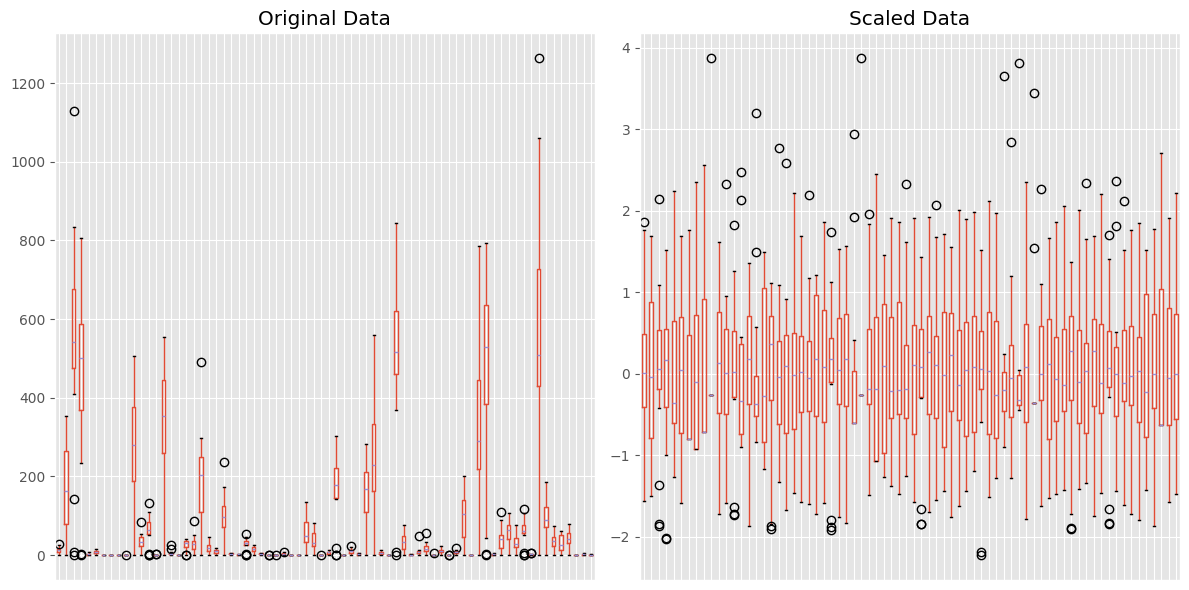

In [31]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
pd.DataFrame(CLT_pivot_normalized , columns=CLT_pivot_normalized .columns).boxplot(ax=axes[0])
axes[0].set_title('Original Data')
axes[0].tick_params(axis='x', which='both', bottom=False, top=False,labelbottom =False)

pd.DataFrame(CLT_standard_norm, columns=CLT_standard_norm.columns).boxplot(ax=axes[1])
axes[1].set_title('Scaled Data')
axes[1].tick_params(axis='x', which='both', bottom=False, top=False,labelbottom =False)
#plt.xticks(visible=False)  #hides the x-labels only works wit single chart
plt.tight_layout()
plt.show()

One method of visualizing relationships is through correlation heat map.   Crimes such as bribery, disorderly conduct, and hacking contain a lot of darker colors.  This indicates slightly negative association which means as one crime increase the other crime decreases.

**Talk more about relationships**


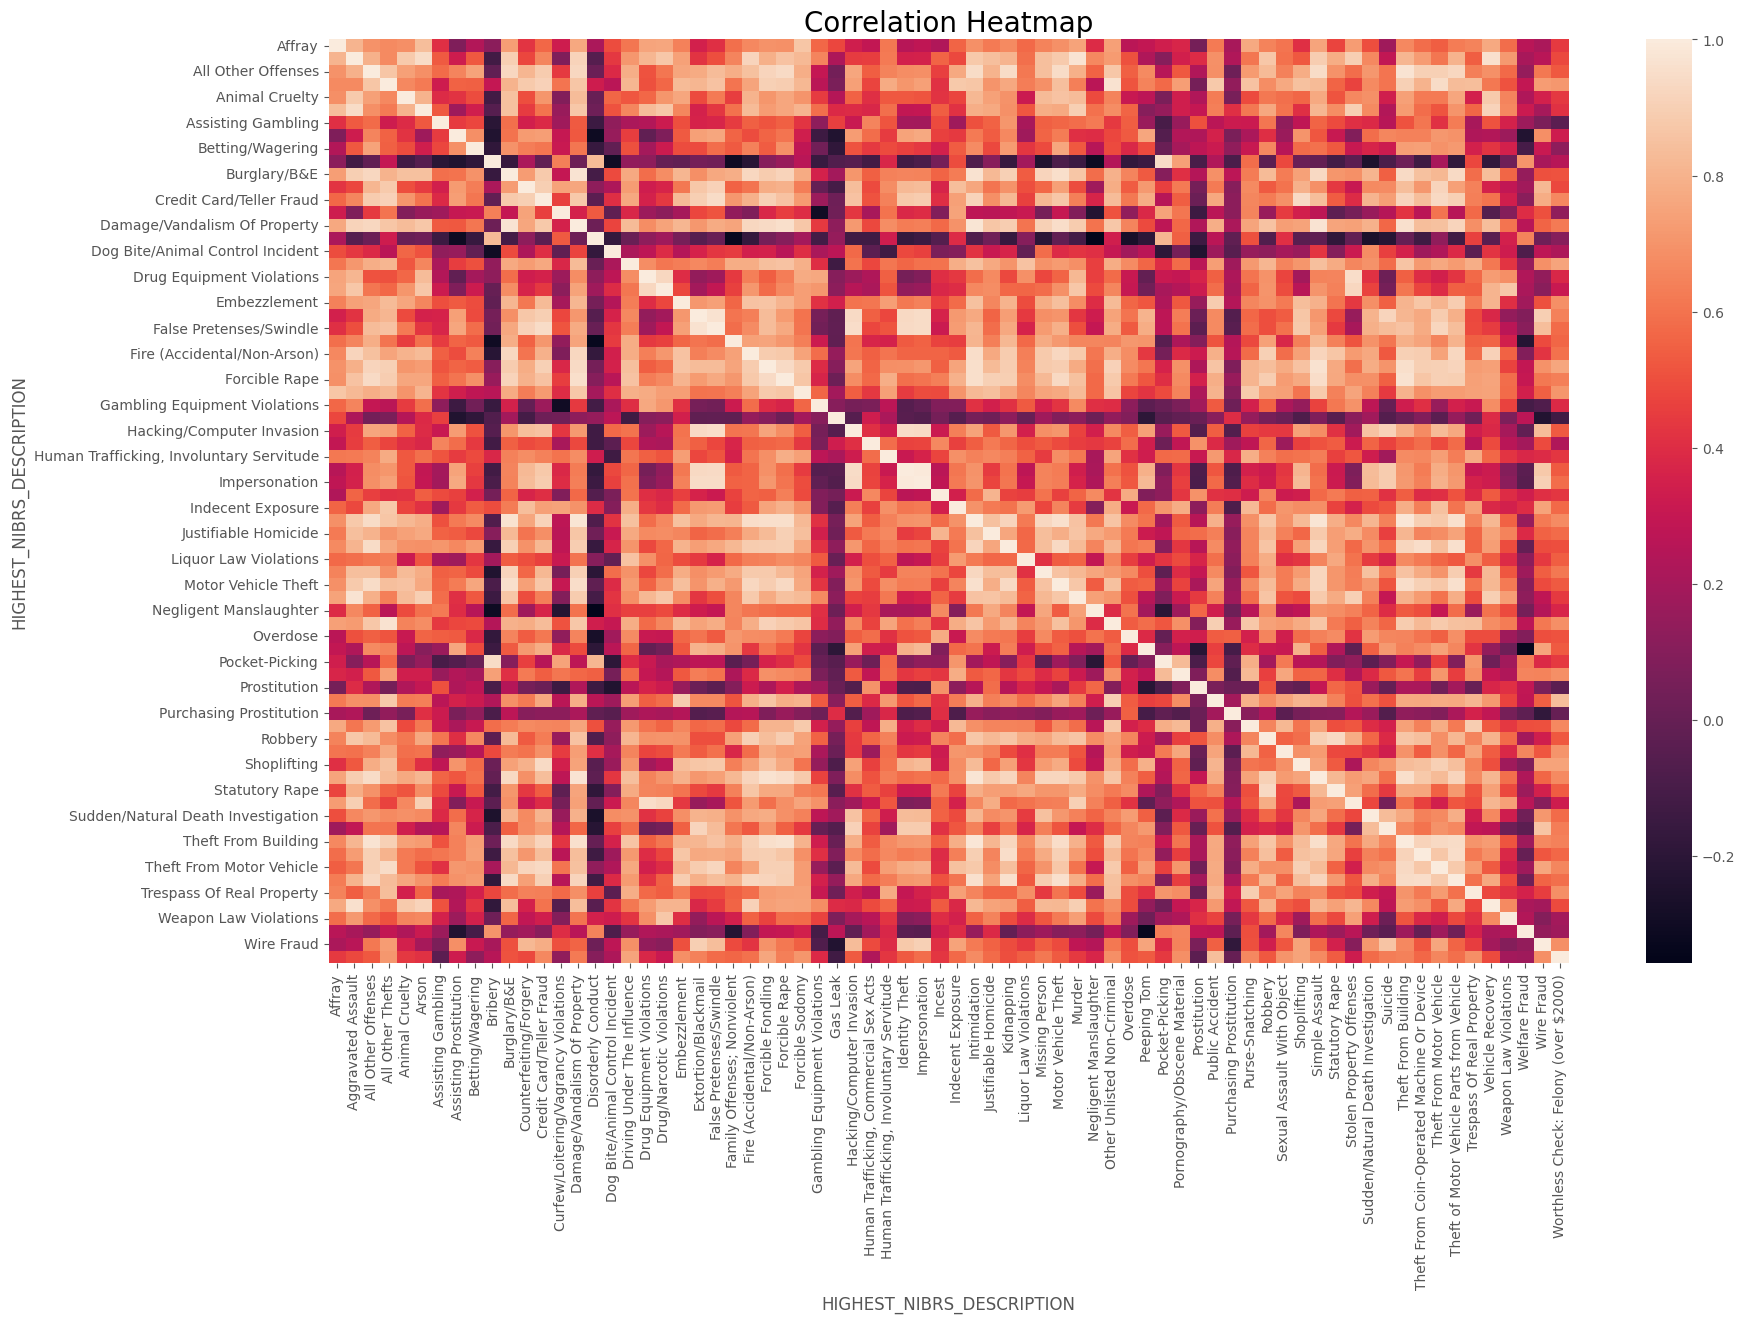

In [32]:
# Get the correlations

corr = CLT_pivot.corr()

# Create a mask so that way we only see the lower half of the matrix
mask = np.triu(np.ones_like(corr, dtype=bool))

plt.figure(figsize=(20, 12))

sns.heatmap(corr)

plt.title('Correlation Heatmap', fontsize=20)
plt.show()

In [34]:
'''
street_map = '/content/sample_data/Zipcode.shp'
map_df = gpd.read_file(street_map)
map_df_copy = gpd.read_file(street_map)
#map_df.head()
'''


"\nstreet_map = '/content/sample_data/Zipcode.shp'\nmap_df = gpd.read_file(street_map)\nmap_df_copy = gpd.read_file(street_map)\n#map_df.head()\n"

In [35]:
'''
fig, ax = plt.subplots(figsize=(7,7))
map_df.plot(ax=ax)
'''

'\nfig, ax = plt.subplots(figsize=(7,7))\nmap_df.plot(ax=ax)\n'

### **Modeling (Clustering)**

`What model(s) do you use to try to solve your problem? Why do you choose those model(s)?`

`For example, why choose k-means over agglomerative, or vice versa? Or perhaps experiment with both and discuss the pros/cons of each? You may also try experimenting with other methods of clustering not discussed in class.`

For this project, we experimented with k-means and agglomerative.  Both algorithms require the data to be standardized. Also, PCA is used to reduce the number of features in the data set while retaining the most important relationships.  Recall the goal is to determine if there are similarities between neighborhoods.  By using clustering we can see those groupings.

k-means

Pros
<ul type ="circle">
 <li>It is easier to use and understand in comparision to Agglomerative Hierarchical Clustering.</li>
 <li>It can handle large dataset with many features.</li>
</ul>

Cons
<ul type ="circle">
 <li>The user must specify the number of clusters in the beginning.</li>
 <li>It assumes spherical and equally sized clusters. So, not suitable for all datasets.</li>
</ul>


Agglomerative Hierarchical Clustering

Pros
<ul type ="circle">
 <li>It does not require that the user to specify the number of clusters in advance.</li>
 <li>It can handle non-spherical and different sized clusters./li>
</ul>

Cons
<ul type ="circle">
 <li>It can be slower.</li>
 <li>It can be computational complex.</li>
</ul>

#### **Principal Component Analysis (PCA)**

PCA will be used to reduce the number of features in the data set while retaining the most important relationships. It reduced to just 3 combinations of features.



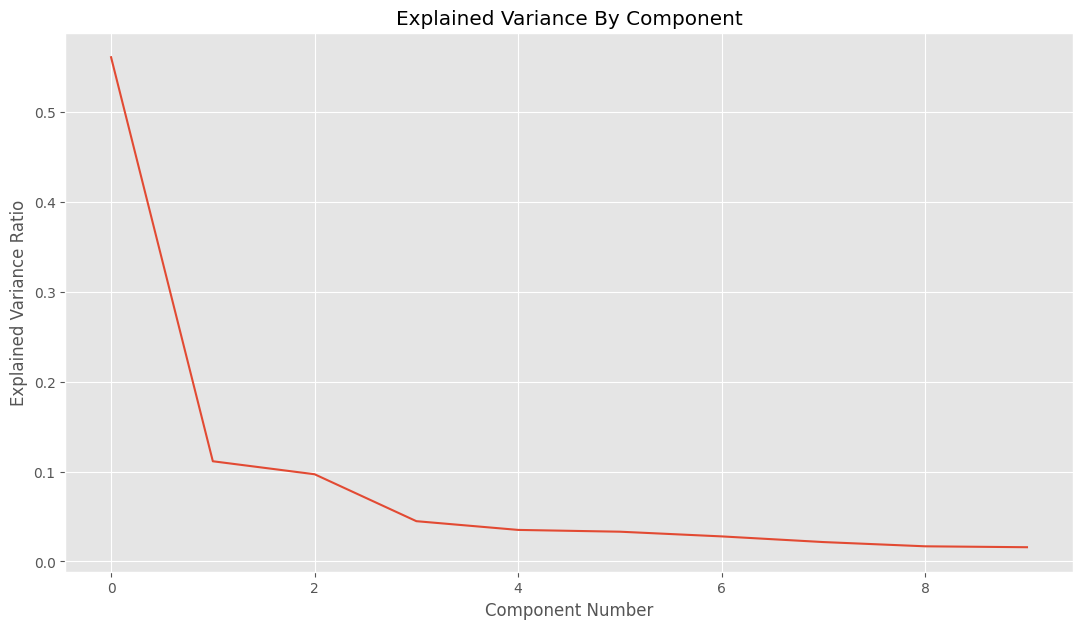

In [36]:
# documentation: https://scikit-learn.org/dev/modules/generated/sklearn.decomposition.PCA.html

pca = PCA(n_components=0.95) # instead of us picking the number, let it pick
pca.fit(CLT_standard_norm)

# Get percentage of variance explained by each of the selected components
plt.plot(pca.explained_variance_ratio_)

plt.xlabel('Component Number')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance By Component')
#plt.figure(figsize=(4,4))
plt.show()

In [37]:
# Initialize PCA at the 3 components we want
pca = PCA(n_components = 3, random_state = 42)

# Fit PCA to the data, transform the data and then make it a dataframe we know and love
pca_df = pd.DataFrame(pca.fit_transform(CLT_standard_norm))

pca_df.shape

(16, 3)

### **k-means**

The process for k-means begins with deciding on the number of clusters in the data set.  There are 16 districts (or neighborhoods) in our data.  They are now labeled 0 - 15.

Rather than guessing on the number of clusters, the elbow method is used.  This method plots the variance based on the number of clusters.  The bend in the elbow is selected as the optimal number of clusters. It represents where adding more clusters does not change the sum squared distance of each point to its centroid.  Pick the k value, where the average distance falls. Based on the elbow chart below, there is a sudden fall in average distance at the best number of clusters is 2, 3, 4, and 5. The value of k can be subjective.

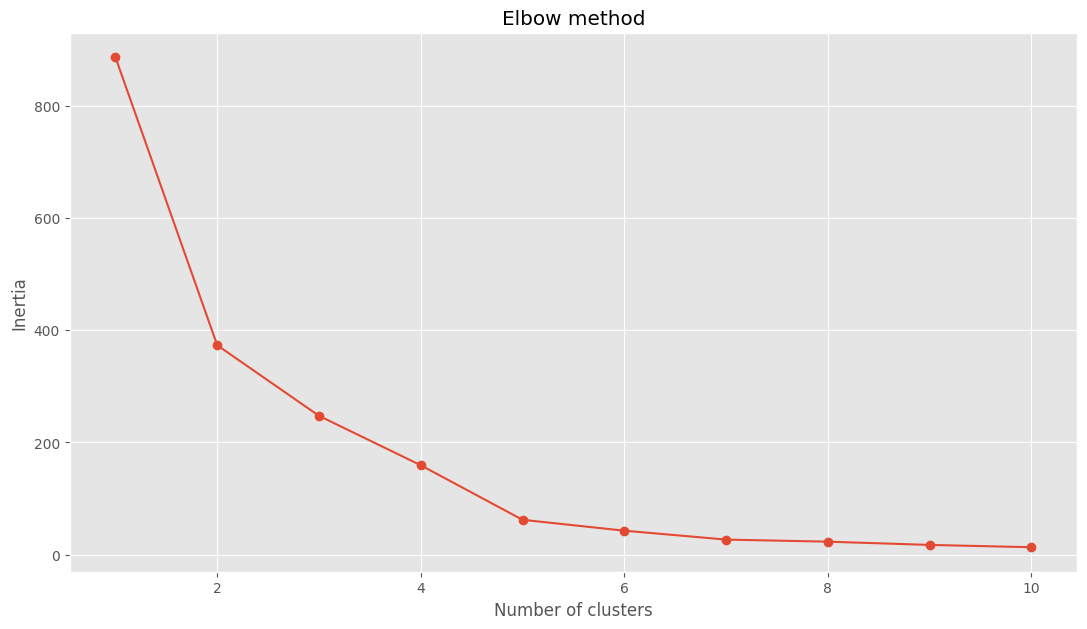

<Figure size 800x500 with 0 Axes>

In [38]:
inertias = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i, random_state=21)
    clusters = kmeans.fit_predict(pca_df)
    inertias.append(kmeans.inertia_)

plt.plot(range(1,11), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.figure(figsize=(8,5))
plt.show()

##### **k-means - 2 clusters**

In [ ]:
# Create the model using two clusters
kmeans = KMeans(n_clusters=2, random_state=21)

# Fit the model
kmeans.fit(pca_df)

# get what cluster the model thinks the points belong to and add it to our original dataframe
CLT_standard_norm["Clusters"] = kmeans.predict(pca_df)

In [ ]:
# Calculate the average distance to the cluster center for each cluster
# Get distances from each point to the cluster centers
distances =kmeans.transform(pca_df)
labels = kmeans.labels_
for i in range(kmeans.n_clusters):
  cluster_distances = distances[labels == i, i]
  average_distances = np.mean(cluster_distances)
  print("Average distances to cluster centers ",i,":", average_distances)

In [ ]:
# Mapping of clusters to division names
cluster_mapping = {
   9: 'North',
   3: 'Eastway',
   14: 'University City',
   1: 'Central',
   15: 'Westover',
   10: 'North Tryon',
   12: 'South',
   0: 'Airport',
   11: 'Providence',
   7: 'Independence',
   13: 'Steele Creek',
   5: 'Hickory Grove',
   4: 'Freedom',
   8: 'Metro',
   6: 'Huntersville',
   2: 'Davidson'
}
# Map the cluster labels to division names
CLT_standard_norm['Division'] = CLT_standard_norm.index.map(cluster_mapping)

In [ ]:
CLT_standard_norm.groupby(['Clusters','Division']).size()

In [ ]:
# Convert to HTML
html_table = CLT_standard_norm.groupby(['Clusters','Division']).size().to_frame().to_html()

#save ti=o file
with open("group2.html", "w") as file:
    file.write(html_table)

##### **k-means - 3 clusters**

In [ ]:
# Create the model using three clusters
kmeans = KMeans(n_clusters=3, random_state=21)

# Fit the model
kmeans.fit(pca_df)

# get what cluster the model thinks the points belong to and add it to our original dataframe
CLT_standard_norm["Clusters"] = kmeans.predict(pca_df)

In [ ]:
# Calculate the average distance to the cluster center for each cluster
# Get distances from each point to the cluster centers
distances =kmeans.transform(pca_df)
labels = kmeans.labels_
for i in range(kmeans.n_clusters):
  cluster_distances = distances[labels == i, i]
  average_distances = np.mean(cluster_distances)
  print("Average distances to cluster centers ",i,":", average_distances)

In [ ]:
# Map the cluster labels to division names
CLT_standard_norm['Division'] = CLT_standard_norm.index.map(cluster_mapping)

In [ ]:
CLT_standard_norm.groupby(['Clusters','Division']).size()


In [ ]:
# Convert to HTML
html_table = CLT_standard_norm.groupby(['Clusters','Division']).size().to_frame().to_html()

#save ti=o file
with open("group3.html", "w") as file:
    file.write(html_table)

##### **k-means - 4 clusters**

In [69]:
# Create the model using four clusters
kmeans = KMeans(n_clusters=4, random_state=21)

# Fit the model
kmeans.fit(pca_df)

# get what cluster the model thinks the points belong to and add it to our original dataframe
CLT_standard_norm["Clusters"] = kmeans.predict(pca_df)

In [70]:
# Calculate the average distance to the cluster center for each cluster
# Get distances from each point to the cluster centers
distances =kmeans.transform(pca_df)
labels = kmeans.labels_
for i in range(kmeans.n_clusters):
  cluster_distances = distances[labels == i, i]
  average_distances = np.mean(cluster_distances)
  print("Average distances to cluster centers ",i,":", average_distances)

Average distances to cluster centers  0 : 1.048895108693887
Average distances to cluster centers  1 : 1.7914051320116562
Average distances to cluster centers  2 : 3.9403778182007745
Average distances to cluster centers  3 : 2.02173097587902


In [71]:
CLT_standard_norm['Clusters'].value_counts()

,count
Clusters,
2,6
1,4
0,3
3,3


In [72]:
# Map the cluster labels to division names
CLT_standard_norm['Division'] = CLT_standard_norm.index.map(cluster_mapping)


In [73]:
CLT_standard_norm.groupby(['Clusters','Division']).size()

Clusters  Division       
0         Airport            1
          Davidson           1
          Huntersville       1
1         Freedom            1
          Metro              1
          North Tryon        1
          Westover           1
2         Central            1
          Eastway            1
          Hickory Grove      1
          Independence       1
          Providence         1
          South              1
3         North              1
          Steele Creek       1
          University City    1
dtype: int64

In [78]:
'''
group4 = CLT_standard_norm.groupby(['Clusters','Division']).size()
group4.to_html("group4.html",index="false")
'''
# Convert to HTML
html_table = CLT_standard_norm.groupby(['Clusters','Division']).size().to_frame().to_html()

#save ti=o file
with open("group4.html", "w") as file:
    file.write(html_table)

##### **k-means - 5 clusters**

In [79]:
# Create the model using five clusters
kmeans = KMeans(n_clusters=5, random_state=21)

# Fit the model
kmeans.fit(pca_df)

# get what cluster the model thinks the points belong to and add it to our original dataframe
CLT_standard_norm["Clusters"] = kmeans.predict(pca_df)

In [80]:
# Calculate the average distance to the cluster center for each cluster
# Get distances from each point to the cluster centers
distances =kmeans.transform(pca_df)
labels = kmeans.labels_
for i in range(kmeans.n_clusters):
  cluster_distances = distances[labels == i, i]
  average_distances = np.mean(cluster_distances)
  print("Average distances to cluster centers ",i,":", average_distances)

Average distances to cluster centers  0 : 1.048895108693887
Average distances to cluster centers  1 : 1.7914051320116562
Average distances to cluster centers  2 : 2.412588434415901
Average distances to cluster centers  3 : 2.02173097587902
Average distances to cluster centers  4 : 0.0


In [81]:
CLT_standard_norm['Clusters'].value_counts()

,count
Clusters,
2,5
1,4
0,3
3,3
4,1


In [82]:
# Map the cluster labels to division names
CLT_standard_norm['Division'] = CLT_standard_norm.index.map(cluster_mapping)
CLT_standard_norm.groupby(['Clusters','Division']).size()


Clusters  Division       
0         Airport            1
          Davidson           1
          Huntersville       1
1         Freedom            1
          Metro              1
          North Tryon        1
          Westover           1
2         Eastway            1
          Hickory Grove      1
          Independence       1
          Providence         1
          South              1
3         North              1
          Steele Creek       1
          University City    1
4         Central            1
dtype: int64

In [83]:
# Convert to HTML
html_table = CLT_standard_norm.groupby(['Clusters','Division']).size().to_frame().to_html()

#save ti=o file
with open("group5.html", "w") as file:
    file.write(html_table)

##### **k-means - 6 clusters**

In [84]:
# Create the model using six clusters
kmeans = KMeans(n_clusters=6, random_state=21)

# Fit the model
kmeans.fit(pca_df)

# get what cluster the model thinks the points belong to and add it to our original dataframe
CLT_standard_norm["Clusters"] = kmeans.predict(pca_df)

In [85]:
# Calculate the average distance to the cluster center for each cluster
# Get distances from each point to the cluster centers
distances =kmeans.transform(pca_df)
labels = kmeans.labels_
for i in range(kmeans.n_clusters):
  cluster_distances = distances[labels == i, i]
  average_distances = np.mean(cluster_distances)
  print("Average distances to cluster centers ",i,":", average_distances)

Average distances to cluster centers  0 : 1.048895108693887
Average distances to cluster centers  1 : 1.4682374763291322
Average distances to cluster centers  2 : 1.8362119818816374
Average distances to cluster centers  3 : 2.02173097587902
Average distances to cluster centers  4 : 0.0
Average distances to cluster centers  5 : 1.4339672723904813


In [86]:
CLT_standard_norm['Clusters'].value_counts()

,count
Clusters,
2,4
0,3
1,3
3,3
5,2
4,1


In [87]:
# Map the cluster labels to division names
CLT_standard_norm['Division'] = CLT_standard_norm.index.map(cluster_mapping)
CLT_standard_norm.groupby(['Clusters','Division']).size()

Clusters  Division       
0         Airport            1
          Davidson           1
          Huntersville       1
1         Freedom            1
          Metro              1
          North Tryon        1
2         Eastway            1
          Hickory Grove      1
          Independence       1
          Westover           1
3         North              1
          Steele Creek       1
          University City    1
4         Central            1
5         Providence         1
          South              1
dtype: int64

In [88]:
# Convert to HTML
html_table = CLT_standard_norm.groupby(['Clusters','Division']).size().to_frame().to_html()

#save ti=o file
with open("group6.html", "w") as file:
    file.write(html_table)

##### **k-means - 7 clusters**

In [89]:
# Create the model using seven clusters
kmeans = KMeans(n_clusters=7, random_state=21)

# Fit the model
kmeans.fit(pca_df)

# get what cluster the model thinks the points belong to and add it to our original dataframe
CLT_standard_norm["Clusters"] = kmeans.predict(pca_df)

In [90]:
# Calculate the average distance to the cluster center for each cluster
# Get distances from each point to the cluster centers
distances =kmeans.transform(pca_df)
labels = kmeans.labels_
for i in range(kmeans.n_clusters):
  cluster_distances = distances[labels == i, i]
  average_distances = np.mean(cluster_distances)
  print("Average distances to cluster centers ",i,":", average_distances)

Average distances to cluster centers  0 : 1.048895108693887
Average distances to cluster centers  1 : 1.4682374763291322
Average distances to cluster centers  2 : 1.1335497740018676
Average distances to cluster centers  3 : 1.3122798082020588
Average distances to cluster centers  4 : 0.0
Average distances to cluster centers  5 : 1.4339672723904813
Average distances to cluster centers  6 : 1.5523602775977956


In [91]:
CLT_standard_norm['Clusters'].value_counts()

,count
Clusters,
0,3
2,3
1,3
6,2
5,2
3,2
4,1


In [92]:
# Map the cluster labels to division names
CLT_standard_norm['Division'] = CLT_standard_norm.index.map(cluster_mapping)
CLT_standard_norm.groupby(['Clusters','Division']).size()

Clusters  Division       
0         Airport            1
          Davidson           1
          Huntersville       1
1         Freedom            1
          Metro              1
          North Tryon        1
2         Eastway            1
          Hickory Grove      1
          Independence       1
3         Steele Creek       1
          University City    1
4         Central            1
5         Providence         1
          South              1
6         North              1
          Westover           1
dtype: int64

In [93]:
# Convert to HTML
html_table = CLT_standard_norm.groupby(['Clusters','Division']).size().to_frame().to_html()

#save ti=o file
with open("group7.html", "w") as file:
    file.write(html_table)

##### **k-means - 8 clusters**

In [94]:
# Create the model using eight clusters
kmeans = KMeans(n_clusters=8, random_state=21)

# Fit the model
kmeans.fit(pca_df)

# get what cluster the model thinks the points belong to and add it to our original dataframe
CLT_standard_norm["Clusters"] = kmeans.predict(pca_df)

In [95]:
# Calculate the average distance to the cluster center for each cluster
# Get distances from each point to the cluster centers
distances =kmeans.transform(pca_df)
labels = kmeans.labels_
for i in range(kmeans.n_clusters):
  cluster_distances = distances[labels == i, i]
  average_distances = np.mean(cluster_distances)
  print("Average distances to cluster centers ",i,":", average_distances)

Average distances to cluster centers  0 : 0.0
Average distances to cluster centers  1 : 1.1335497740018676
Average distances to cluster centers  2 : 1.3122798082020588
Average distances to cluster centers  3 : 0.0
Average distances to cluster centers  4 : 1.4682374763291322
Average distances to cluster centers  5 : 1.4339672723904813
Average distances to cluster centers  6 : 1.5523602775977956
Average distances to cluster centers  7 : 0.08850868075261464


In [96]:
CLT_standard_norm['Clusters'].value_counts()

,count
Clusters,
1,3
4,3
7,2
6,2
5,2
2,2
0,1
3,1


In [97]:
# Map the cluster labels to division names
CLT_standard_norm['Division'] = CLT_standard_norm.index.map(cluster_mapping)
CLT_standard_norm.groupby(['Clusters','Division']).size()

Clusters  Division       
0         Airport            1
1         Eastway            1
          Hickory Grove      1
          Independence       1
2         Steele Creek       1
          University City    1
3         Central            1
4         Freedom            1
          Metro              1
          North Tryon        1
5         Providence         1
          South              1
6         North              1
          Westover           1
7         Davidson           1
          Huntersville       1
dtype: int64

In [98]:
'''
# Convert to HTML
html_table = CLT_standard_norm.groupby(['Clusters','Division']).size().to_frame().to_html()

#save ti=o file
with open("group8.html", "w") as file:
    file.write(html_table)
  '''

##### **k-means - 9 clusters**

In [ ]:
# Create the model using eight clusters
kmeans = KMeans(n_clusters=8, random_state=21)

# Fit the model
kmeans.fit(pca_df)

# get what cluster the model thinks the points belong to and add it to our original dataframe
CLT_standard_norm["Clusters"] = kmeans.predict(pca_df)

In [ ]:
# Calculate the average distance to the cluster center for each cluster
# Get distances from each point to the cluster centers
distances =kmeans.transform(pca_df)
labels = kmeans.labels_
for i in range(kmeans.n_clusters):
  cluster_distances = distances[labels == i, i]
  average_distances = np.mean(cluster_distances)
  print("Average distances to cluster centers ",i,":", average_distances)

In [ ]:
CLT_standard_norm['Clusters'].value_counts()

In [ ]:
# Map the cluster labels to division names
CLT_standard_norm['Division'] = CLT_standard_norm.index.map(cluster_mapping)
CLT_standard_norm.groupby(['Clusters','Division']).size()

In [ ]:
# Convert to HTML
html_table = CLT_standard_norm.groupby(['Clusters','Division']).size().to_frame().to_html()

#save ti=o file
with open("group9.html", "w") as file:
    file.write(html_table)

Another method for determining the number of clusters is silhouette.  This method compute coefficients of each point and measures how much a point is like its own cluster compared to  other clusters.  The score ranges between 1 and -1 where a high represents that the point matches the cluster.  Based on visualization, five seems to be the optimal number of clusters.

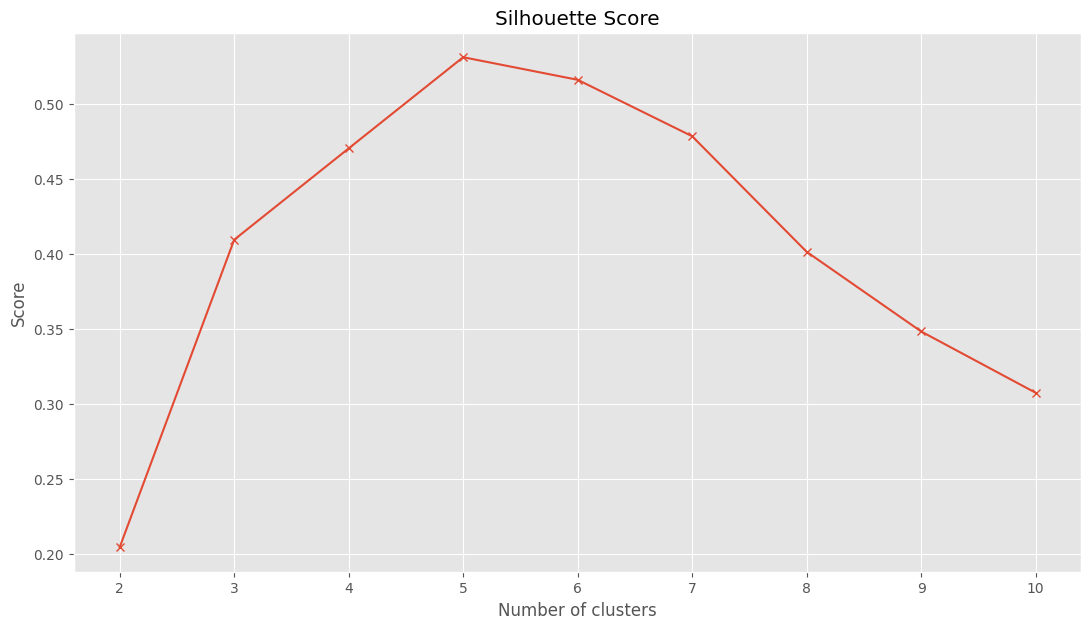

In [60]:
silhouette_scores = []

for i in range(2,11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    clusters = kmeans.fit_predict(pca_df)
    silhouette_scores.append(silhouette_score(pca_df, clusters))

plt.plot(range(2,11), silhouette_scores, marker='x')
plt.title('Silhouette Score')
plt.xlabel('Number of clusters')
plt.ylabel('Score')
plt.show()

## **Storytelling (Clustering Analysis)**

Use this section to further analyze your clusters.

What information or insights does it tell you? What have you learned? Were you able to answer your initial problems/questions (if so, discuss that)?

K-Means (k = 5 clusters)

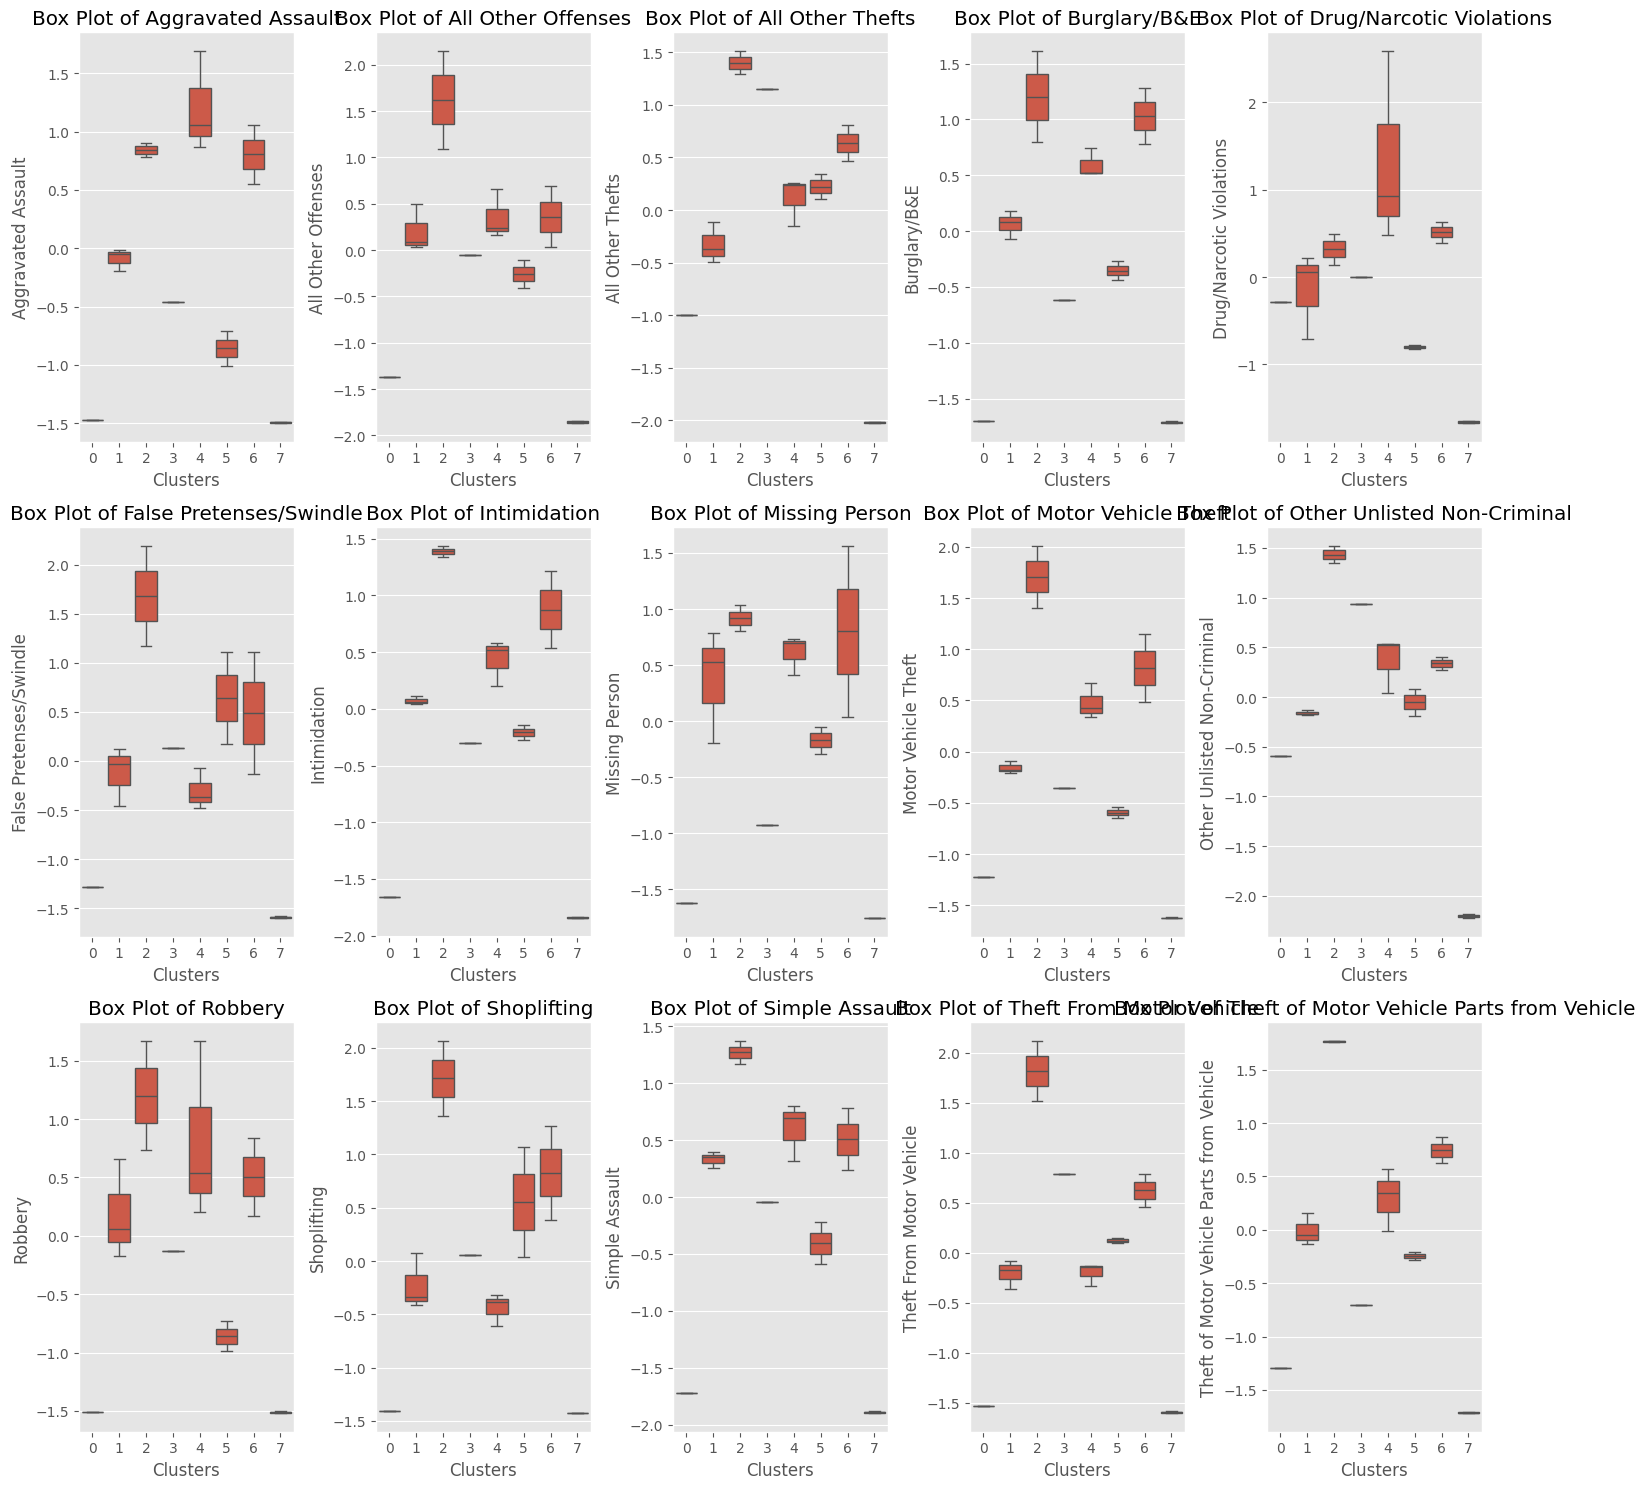

In [61]:
subset = ['Aggravated Assault', 'All Other Offenses', 'All Other Thefts', 'Burglary/B&E','Drug/Narcotic Violations','False Pretenses/Swindle','Intimidation',
          'Missing Person', 'Motor Vehicle Theft', 'Other Unlisted Non-Criminal', 'Robbery', 'Shoplifting','Simple Assault','Theft From Motor Vehicle',
          'Theft of Motor Vehicle Parts from Vehicle']
fig, axs = plt.subplots(3, 5, figsize=(15, 15))

axs = axs.flatten() # need this so you can index axs as a 1D array rather than a multidimensional array

i = 0

for column in subset:
    sns.boxplot(data=CLT_standard_norm, y=column, x=CLT_standard_norm["Clusters"], ax = axs[i])
    axs[i].set_title(f'Box Plot of {column}')
    axs[i].set_xlabel('Clusters')
    axs[i].set_ylabel(column)

    i = i + 1

plt.tight_layout()
plt.show()

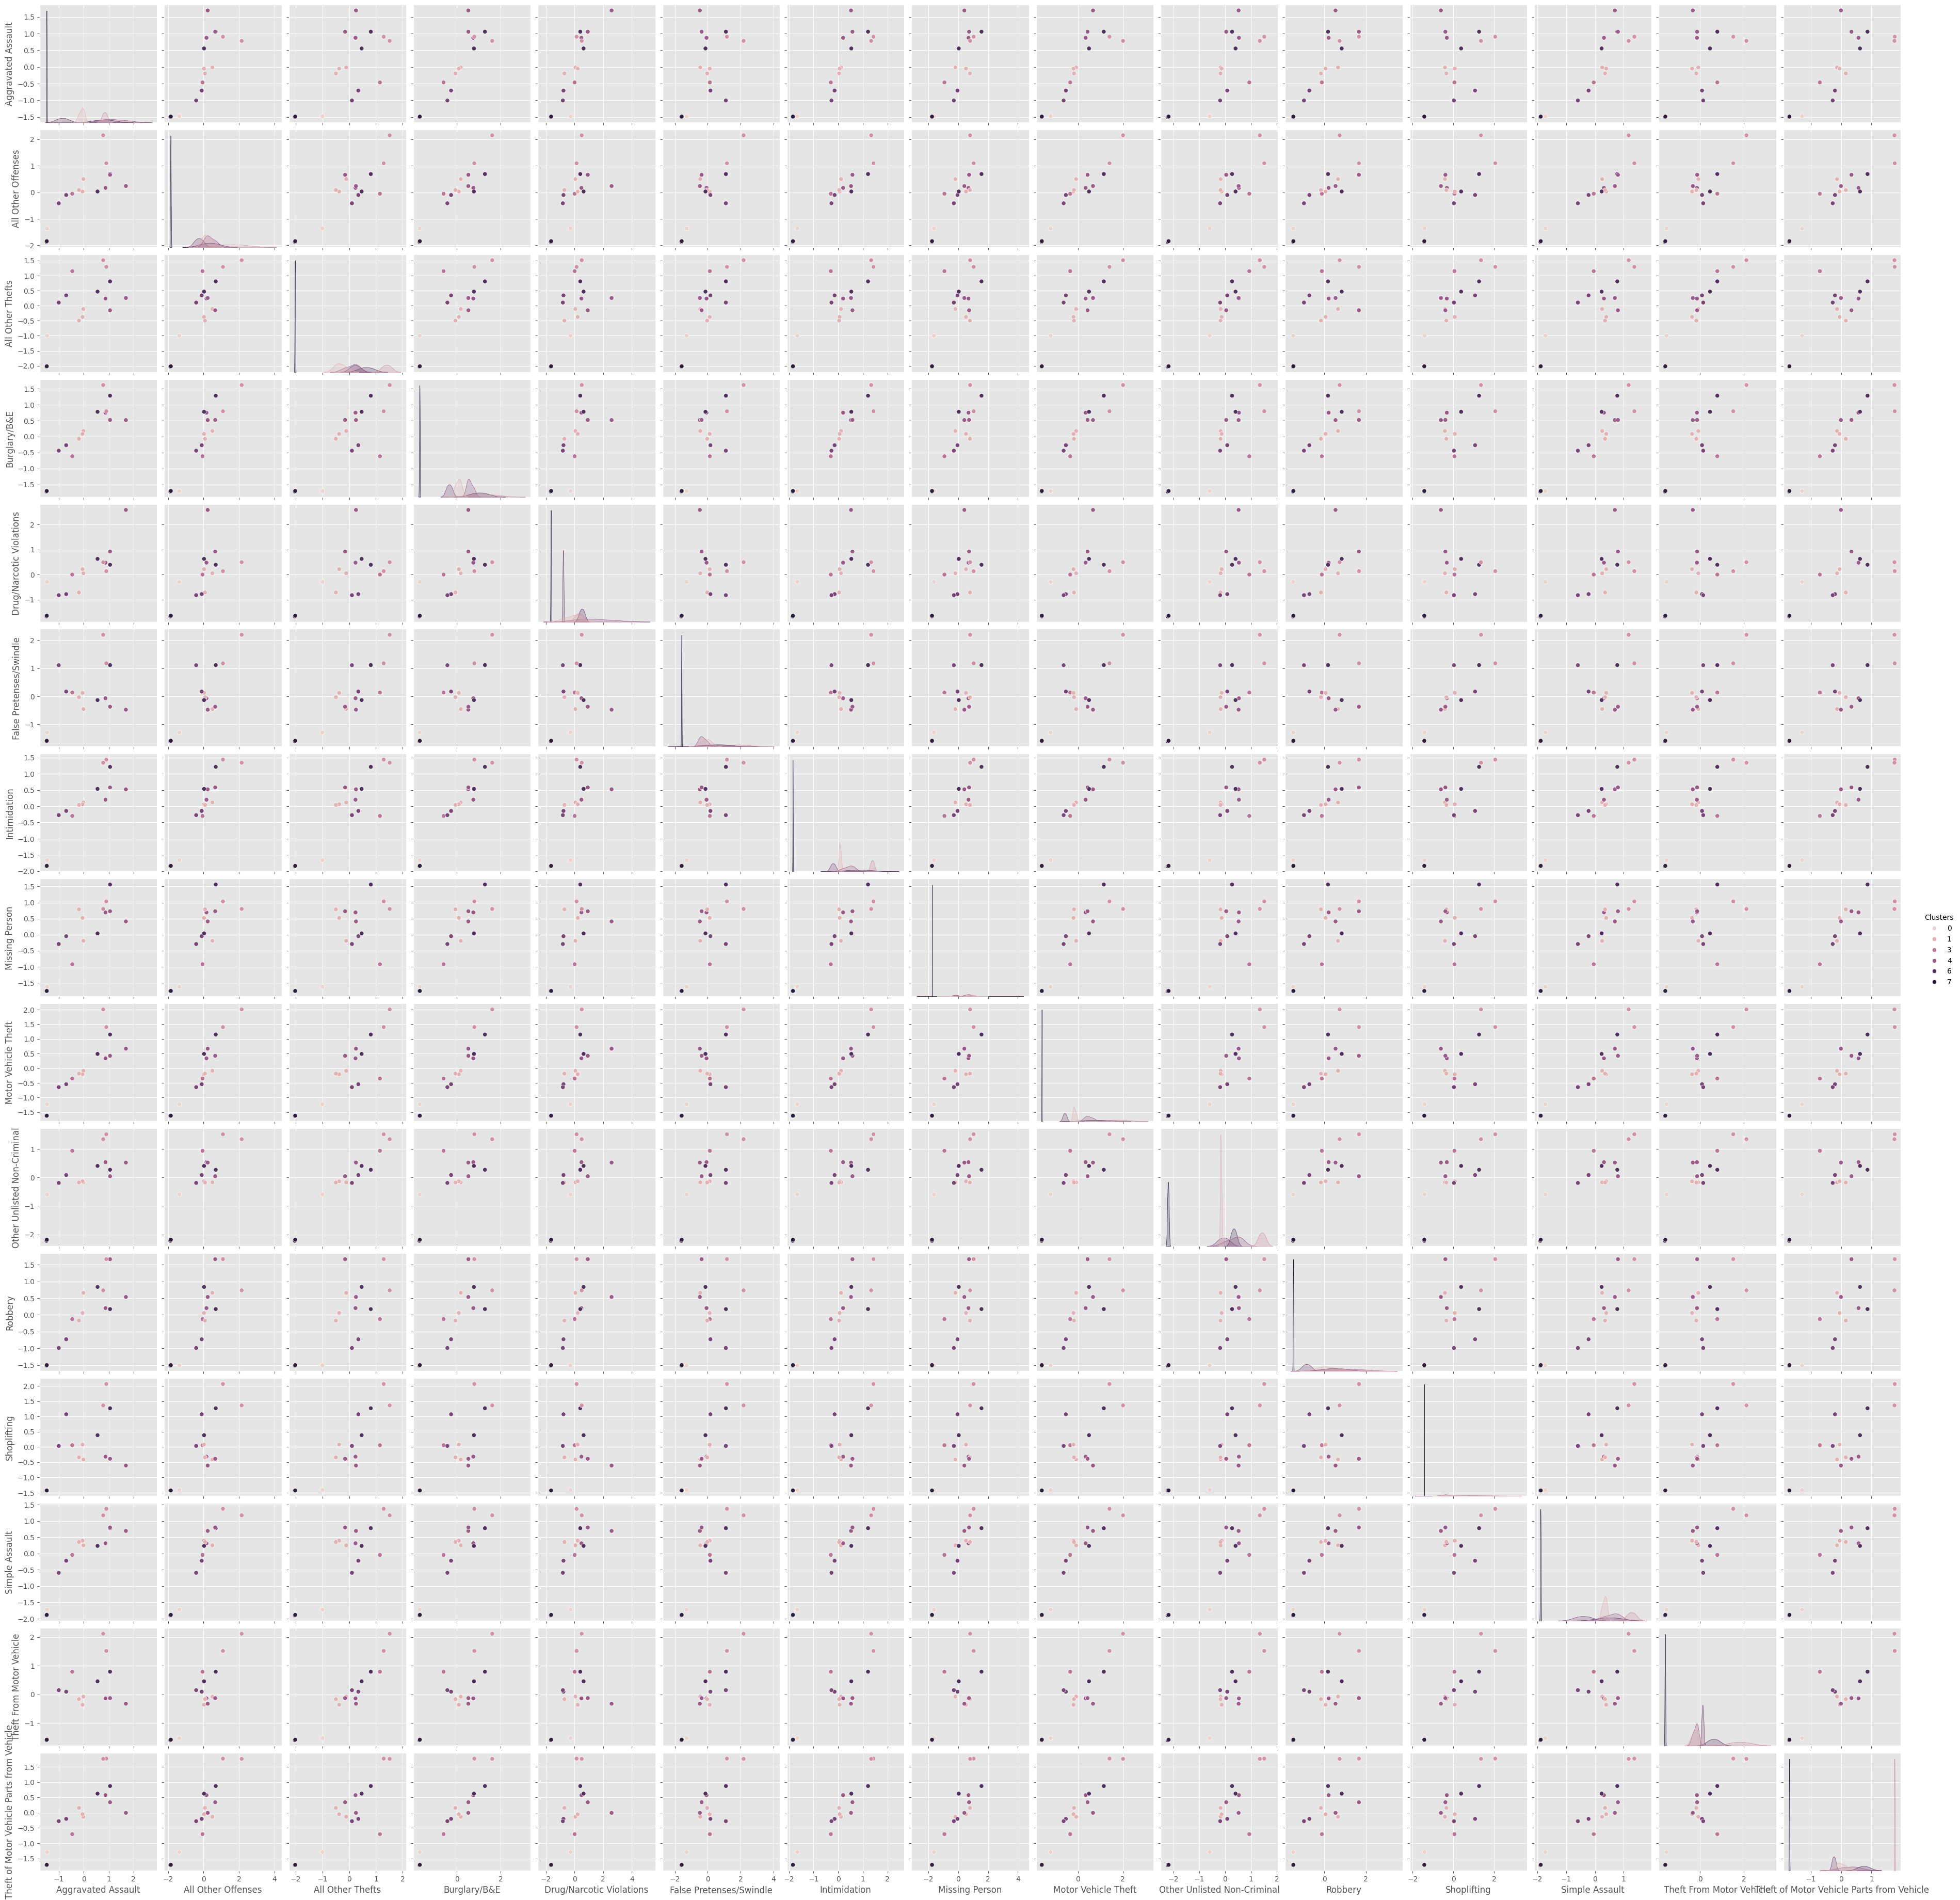

In [62]:
sns.pairplot(CLT_standard_norm, hue='Clusters', vars=subset)
plt.show()

K-Means (k = 2 clusters) comeback - skipped for now

In [68]:
'''
fig, axs = plt.subplots(3, 5, figsize=(15, 15))

axs = axs.flatten() # need this so you can index axs as a 1D array rather than a multidimensional array

i = 0

for column in subset:
    sns.boxplot(data=CLT_standard_norm2, y=column, x=CLT_standard_norm2["Clusters"], ax = axs[i])
    axs[i].set_title(f'Box Plot of {column}')
    axs[i].set_xlabel('Clusters')
    axs[i].set_ylabel(column)

    i = i + 1

plt.tight_layout()
plt.show()
'''

'\nfig, axs = plt.subplots(3, 5, figsize=(15, 15))\n\naxs = axs.flatten() # need this so you can index axs as a 1D array rather than a multidimensional array\n\ni = 0\n\nfor column in subset:\n    sns.boxplot(data=CLT_standard_norm2, y=column, x=CLT_standard_norm2["Clusters"], ax = axs[i])\n    axs[i].set_title(f\'Box Plot of {column}\')\n    axs[i].set_xlabel(\'Clusters\')\n    axs[i].set_ylabel(column)\n\n    i = i + 1\n\nplt.tight_layout()\nplt.show()\n'

In [ ]:
sns.pairplot(CLT_standard_norm2, hue='Clusters', vars=subset)
plt.show()

### **Agglomerative Hierarchical Clustering**

The final method used for clustering and to determine the optimal number of clusters is Agglomerative Hierarchical Clustering.  After the visualization is  created,  horizonal lines are added to the plot.  First, we plot the highest vertical distance that does not intersect with any cluster that line is 3. Then count the number of vertical lines that cross that threshold.  For this method, 8 is the optimal number of clusters.

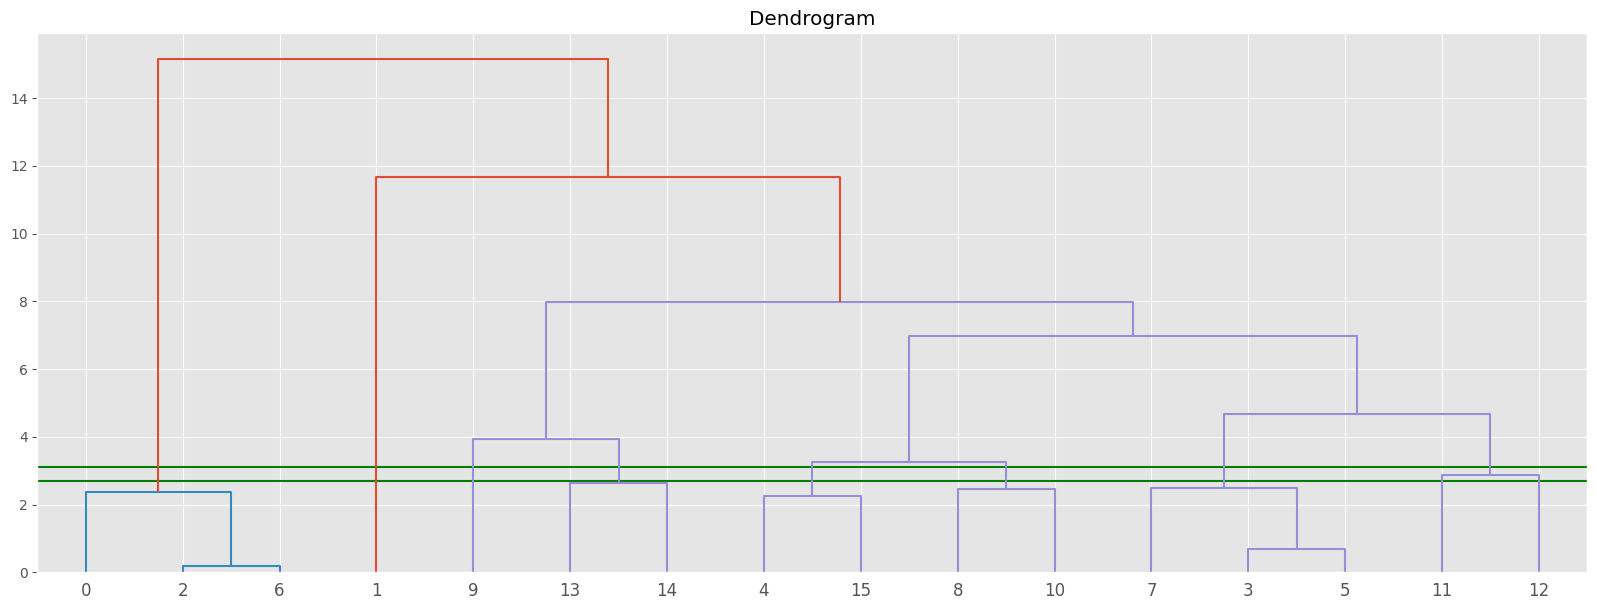

In [64]:
# documentation: https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.dendrogram.html

plt.figure(figsize=(20, 7))
plt.title("Dendrogram")
plt.axhline(y=3.1, color='g', linestyle='-')
plt.axhline(y=2.7, color='g', linestyle='-')
dend = shc.dendrogram(shc.linkage(pca_df, method='average'),truncate_mode='level',p =10)
plt.show()

In [65]:
'''
Agglomerate hierarchical clustering with Ward’s linkage is a technique used to automatically group data points into clusters based
on their similarities. It takes a “bottom-up” approach, starting with each data point in its own cluster and then repeatedly merging
the two closest clusters until a single cluster remains.


# play around with other linkages and see how it effects how many samples are put into clusters. 'single' is a fun one
agglo = AgglomerativeClustering(linkage = 'ward')
CLT_standard_norm2['Clusters'] = agglo.fit_predict(pca_df)
'''

"\nAgglomerate hierarchical clustering with Ward’s linkage is a technique used to automatically group data points into clusters based\non their similarities. It takes a “bottom-up” approach, starting with each data point in its own cluster and then repeatedly merging\nthe two closest clusters until a single cluster remains.\n\n\n# play around with other linkages and see how it effects how many samples are put into clusters. 'single' is a fun one\nagglo = AgglomerativeClustering(linkage = 'ward')\nCLT_standard_norm2['Clusters'] = agglo.fit_predict(pca_df)\n"

In [66]:
#CLT_standard_norm

HIGHEST_NIBRS_DESCRIPTION,Affray,Aggravated Assault,All Other Offenses,All Other Thefts,Animal Cruelty,Arson,Assisting Gambling,Assisting Prostitution,Betting/Wagering,Bribery,Burglary/B&E,Counterfeiting/Forgery,Credit Card/Teller Fraud,Curfew/Loitering/Vagrancy Violations,Damage/Vandalism Of Property,Disorderly Conduct,Dog Bite/Animal Control Incident,Driving Under The Influence,Drug Equipment Violations,Drug/Narcotic Violations,Embezzlement,Extortion/Blackmail,False Pretenses/Swindle,Family Offenses; Nonviolent,Fire (Accidental/Non-Arson),Forcible Fondling,Forcible Rape,Forcible Sodomy,Gambling Equipment Violations,Gas Leak,Hacking/Computer Invasion,"Human Trafficking, Commercial Sex Acts","Human Trafficking, Involuntary Servitude",Identity Theft,Impersonation,Incest,Indecent Exposure,Intimidation,Justifiable Homicide,Kidnapping,Liquor Law Violations,Missing Person,Motor Vehicle Theft,Murder,Negligent Manslaughter,Other Unlisted Non-Criminal,Overdose,Peeping Tom,Pocket-Picking,Pornography/Obscene Material,Prostitution,Public Accident,Purchasing Prostitution,Purse-Snatching,Robbery,Sexual Assault With Object,Shoplifting,Simple Assault,Statutory Rape,Stolen Property Offenses,Sudden/Natural Death Investigation,Suicide,Theft From Building,Theft From Coin-Operated Machine Or Device,Theft From Motor Vehicle,Theft of Motor Vehicle Parts from Vehicle,Trespass Of Real Property,Vehicle Recovery,Weapon Law Violations,Welfare Fraud,Wire Fraud,Worthless Check: Felony (over $2000),Clusters,Division
0,-1.370547,-1.476510,-1.364242,-0.997799,-1.147077,-1.535567,-0.800641,-0.923381,-0.718185,-0.258199,-1.702199,-1.446612,-1.633472,-0.900070,-1.725808,1.494909,-0.718902,-1.860683,-1.188859,-0.289162,-1.174615,-1.504559,-1.285015,-1.514140,-1.473053,-1.796792,-1.724426,-1.822830,-0.601133,-0.258199,-1.423473,-1.063907,-1.268221,-1.328466,-1.286178,-1.257237,-1.441095,-1.659167,-1.697207,-1.505486,-1.317426,-1.622128,-1.227242,-1.435765,-1.189577,-0.594953,-1.482384,-0.968451,-0.467717,-1.281266,-0.444718,-0.815106,-0.356034,-1.440165,-1.508317,-1.475451,-1.409517,-1.722124,-1.409134,-1.284452,-1.689382,-1.385000,-1.655252,-1.344843,-1.527188,-1.289588,-0.824580,-1.143543,1.077753,-0.625543,-1.490805,-1.477098,0,Airport
1,0.447706,-0.464239,-0.054294,1.149668,-0.480788,-0.196788,-0.800641,-0.923381,-0.718185,3.872983,-0.614271,0.840544,-0.062095,2.475193,0.074324,3.200477,-1.161303,0.524718,0.498650,0.002576,-0.061051,0.187739,0.133346,-1.173884,-0.827331,0.414000,0.611955,1.010764,-0.601133,-0.258199,-0.215220,-0.476924,1.457508,-0.482888,-0.352408,0.179605,1.910469,-0.297208,0.414873,-0.616273,0.741999,-0.922181,-0.350604,-0.552217,-1.189577,0.938141,-0.684741,-0.563348,3.656563,2.846613,-0.362930,0.910680,-0.356034,2.263116,-0.125508,1.860351,0.058517,-0.043045,-0.444124,-0.125927,-0.974930,-0.342455,0.105766,-0.510113,0.790820,-0.703145,1.855784,-0.696264,0.093192,2.710687,0.805590,0.984732,3,Central
2,-1.558643,-1.500129,-1.867248,-2.029221,-1.268221,-1.585151,-0.800641,-0.923381,-0.718185,-0.258199,-1.718633,-1.586641,-1.724714,-0.900070,-1.871273,-0.840093,-1.161303,-1.897955,-1.326006,-1.670848,-1.457890,-1.568021,-1.600650,-1.718294,-1.580674,-1.914032,-1.739797,-1.822830,-0.601133,-0.258199,-1.483885,-1.063907,-1.268221,-1.377308,-1.476010,-1.257237,-1.565227,-1.844827,-1.697207,-1.545006,-1.438569,-1.756223,-1.625788,-1.435765,-1.189577,-2.222759,-1.511709,-1.272279,-0.898077,-1.281266,-0.444718,-1.776303,-0.356034,-1.620185,-1.518180,-1.475451,-1.427298,-1.898680,-1.409134,-1.343218,-1.737013,-1.456083,-1.842432,-1.437591,-1.602307,-1.716518,-1.787548,-1.423837,-1.870240,-0.625543,-1.564882,-1.477098,7,Davidson
3,0.604452,-0.016590,0.499368,-0.110348,-0.601932,-0.122411,-0.800641,-0.923381,0.923381,-0.258199,0.176203,-0.192177,-0.308784,0.225018,-0.010046,-0.170049,0.165900,0.990617,0.266096,0.054633,-0.822963,-0.383411,-0.453975,1.139858,0.033631,-0.121950,-0.018253,-0.371477,-0.094916,-0.258199,-0.154807,-0.476924,-0.965362,-0.278

## **Evaluation**

**Silhouette Analysis**

Skip, none of the clusters seems to reach the threshold at the same time.  The process is new, so I look at it further during winter break.  For now, try to use visualization and look at scores.

For n_clusters = 2 The average silhouette_score is : 0.18516377132427525
For n_clusters = 3 The average silhouette_score is : 0.20705357908931038
For n_clusters = 4 The average silhouette_score is : 0.1777985951339155
For n_clusters = 5 The average silhouette_score is : 0.1957258910920542
For n_clusters = 6 The average silhouette_score is : 0.23323937404157408
For n_clusters = 7 The average silhouette_score is : 0.2221452211756465
For n_clusters = 8 The average silhouette_score is : 0.20017884471097758
For n_clusters = 9 The average silhouette_score is : 0.21792280286568863
For n_clusters = 10 The average silhouette_score is : 0.21960507378052563


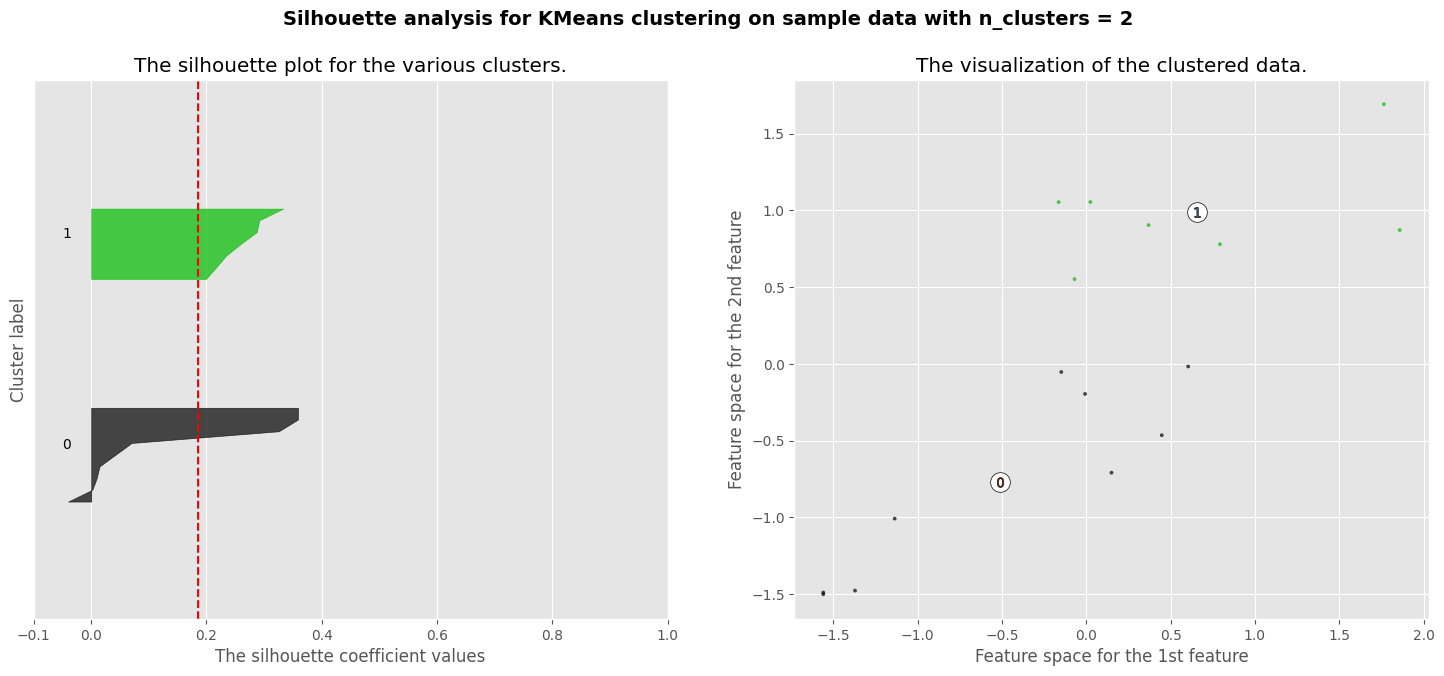

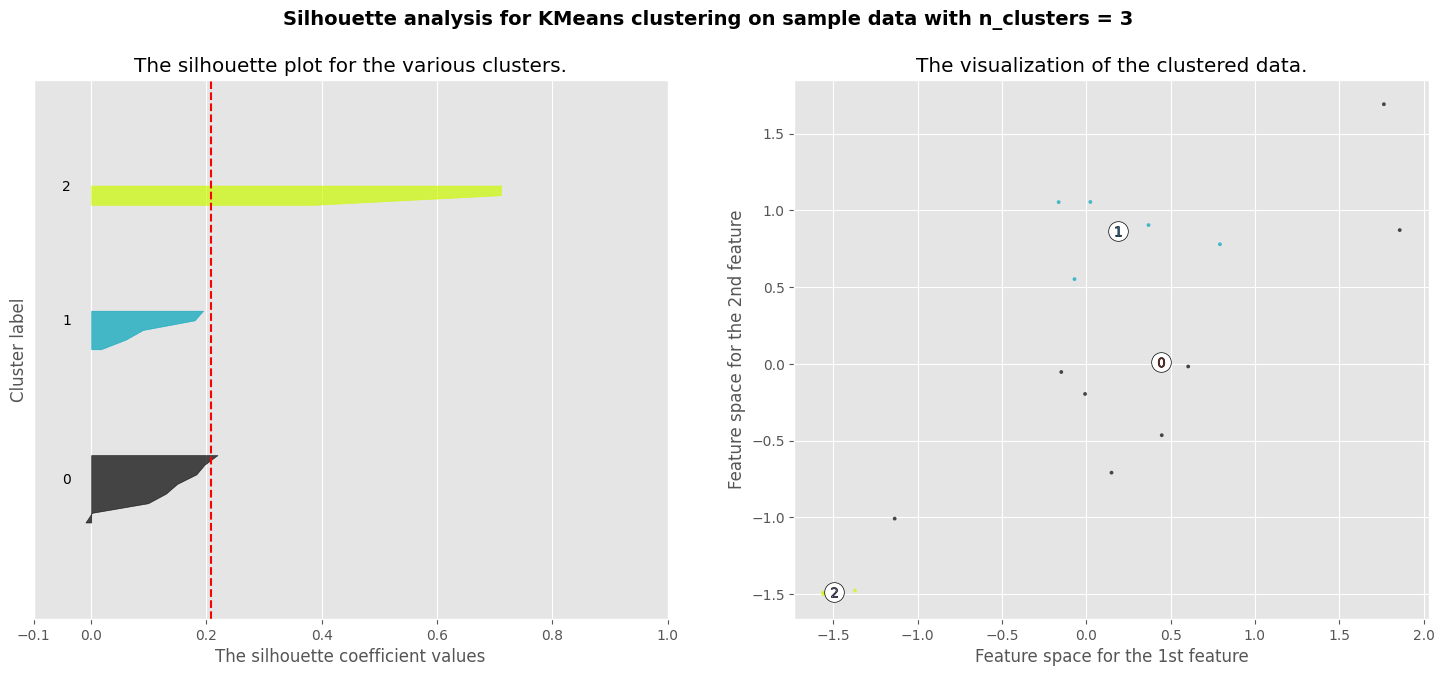

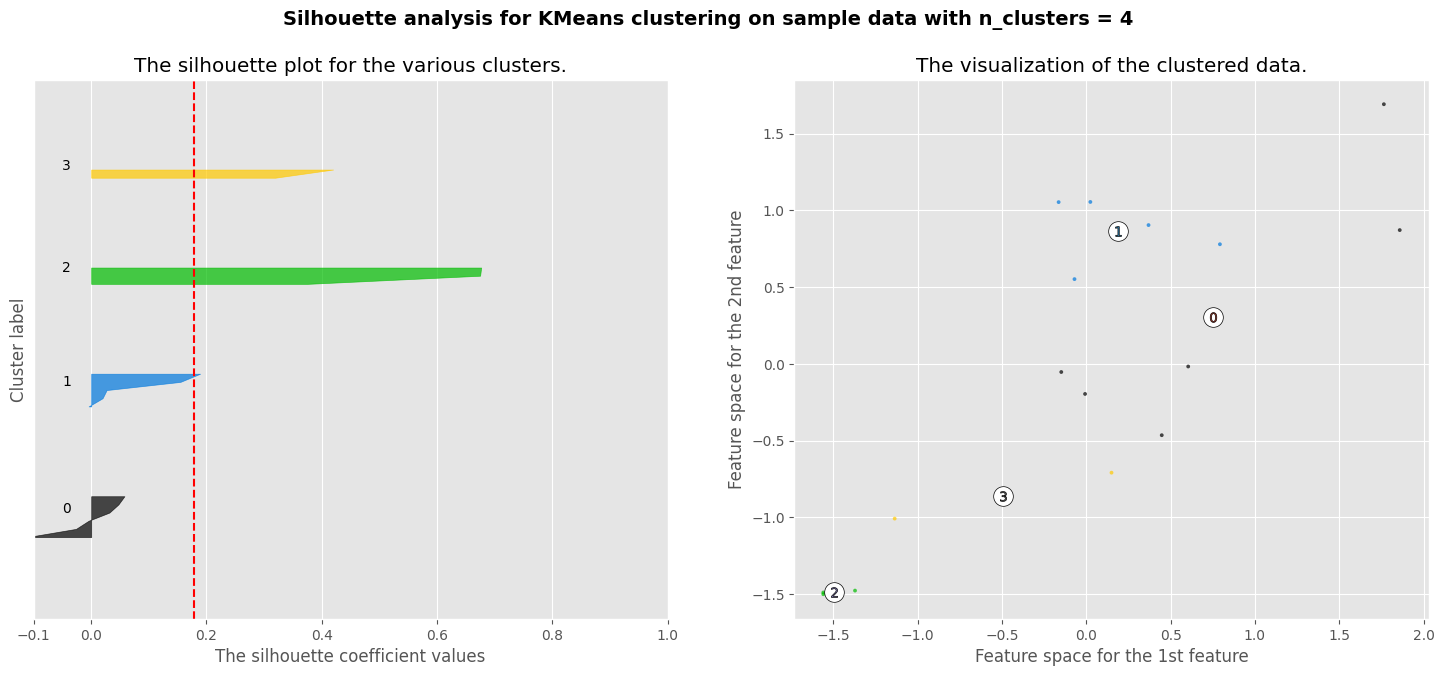

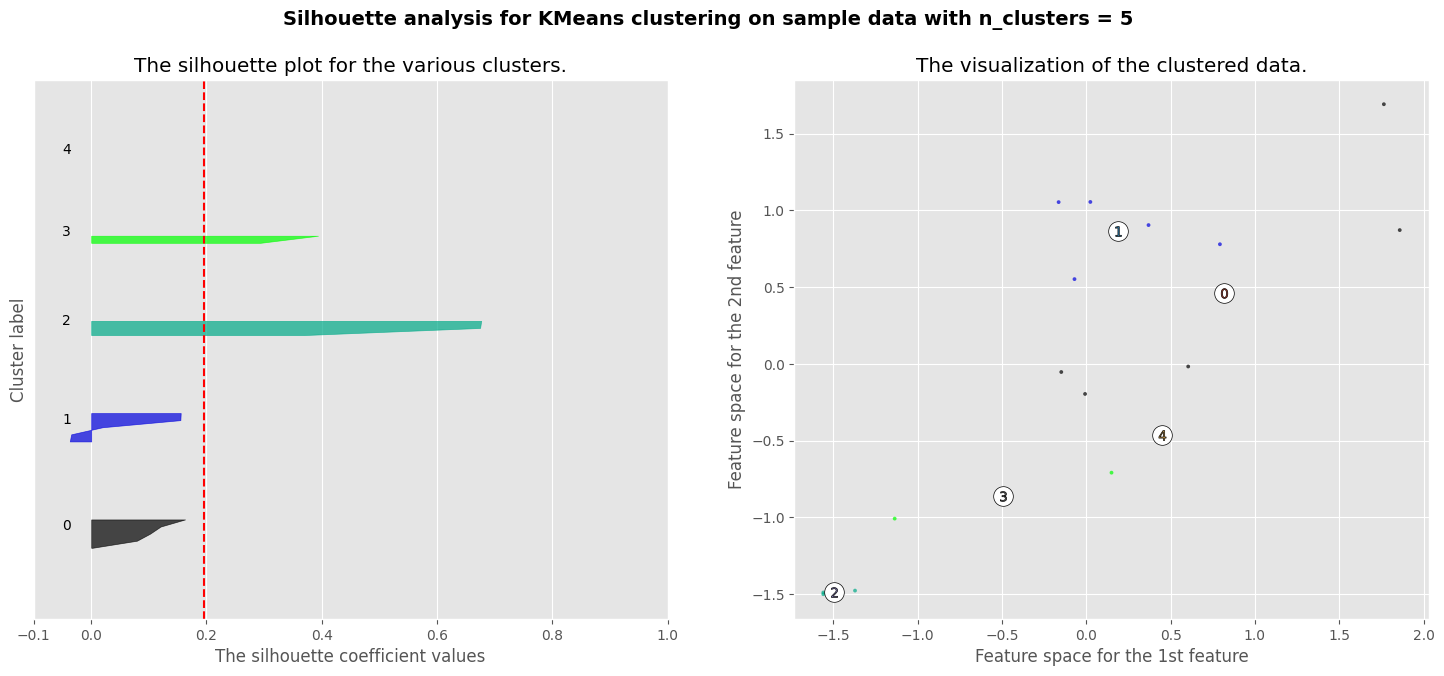

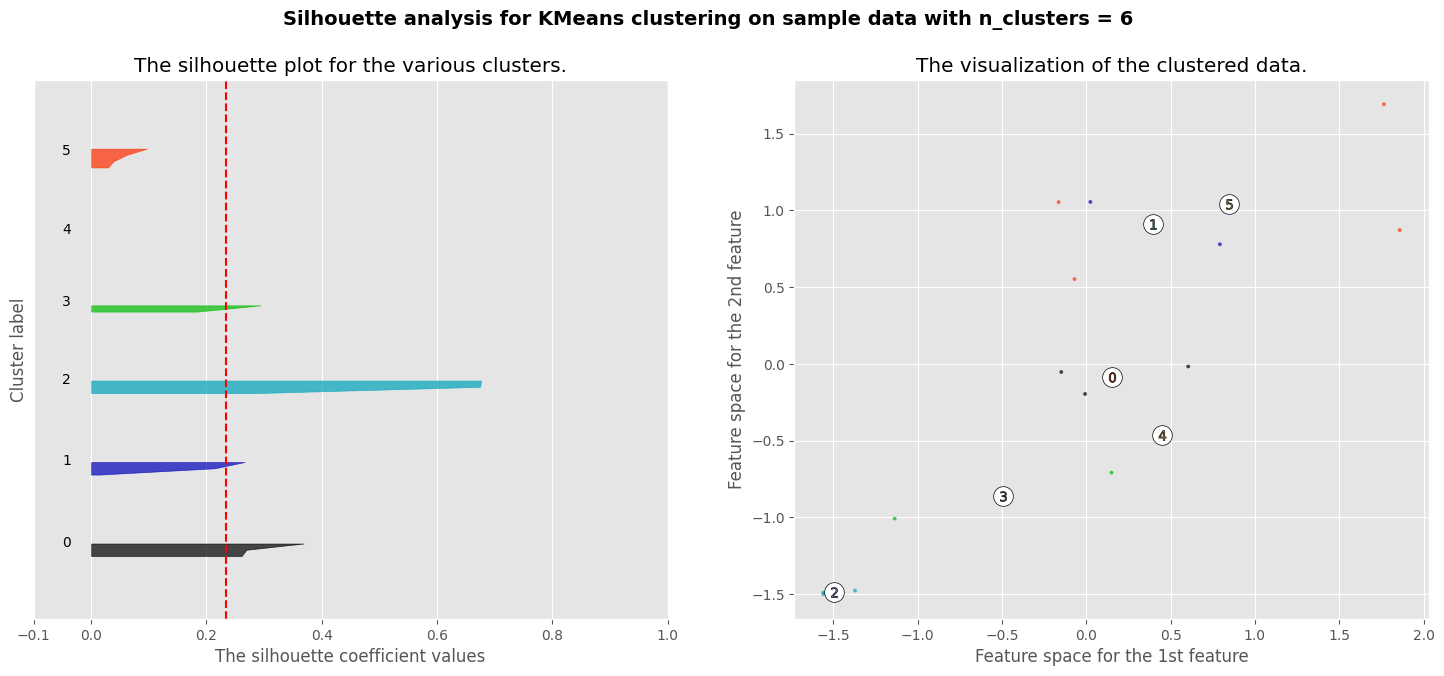

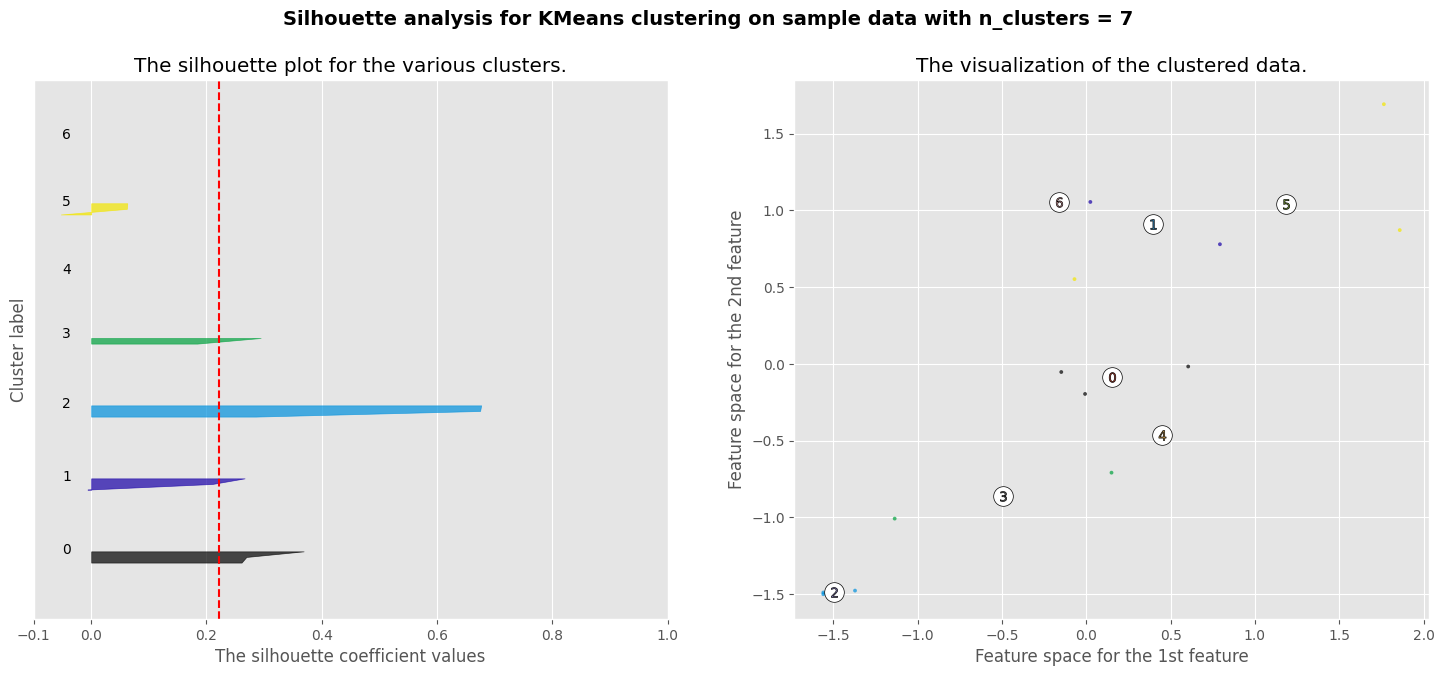

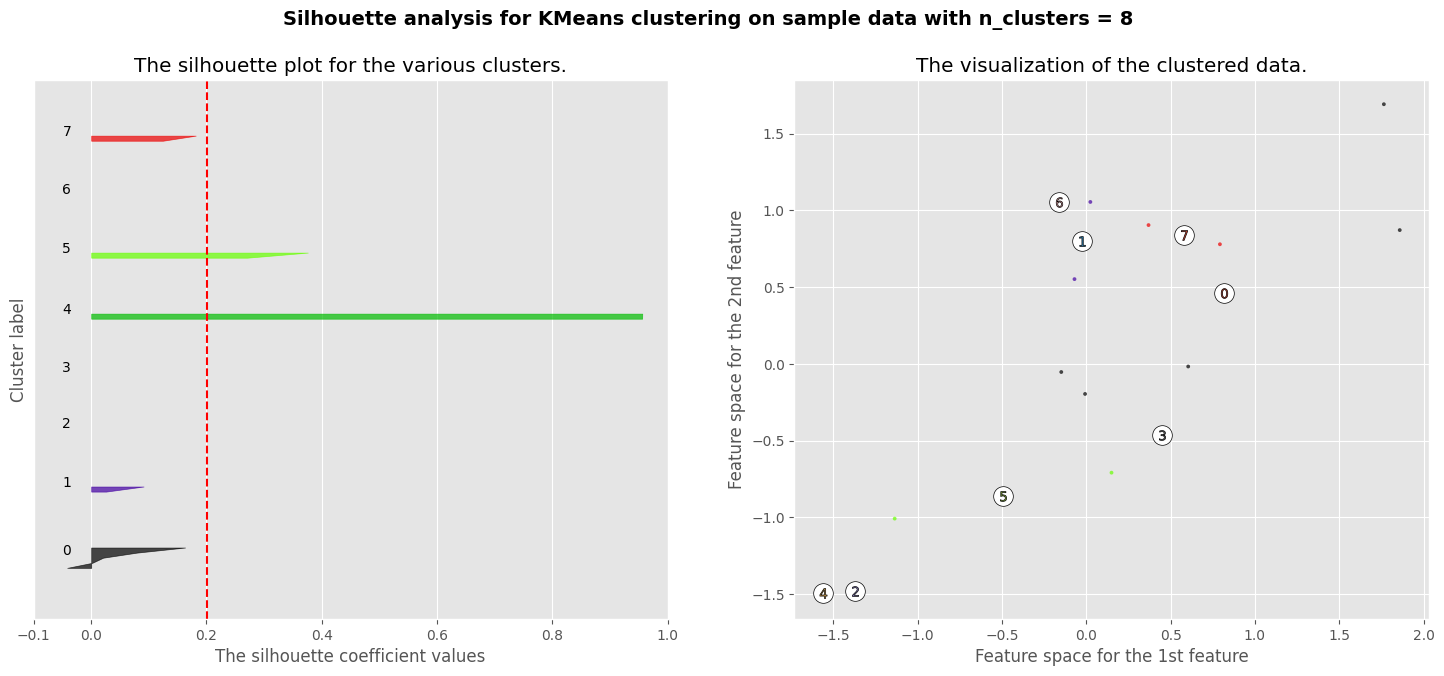

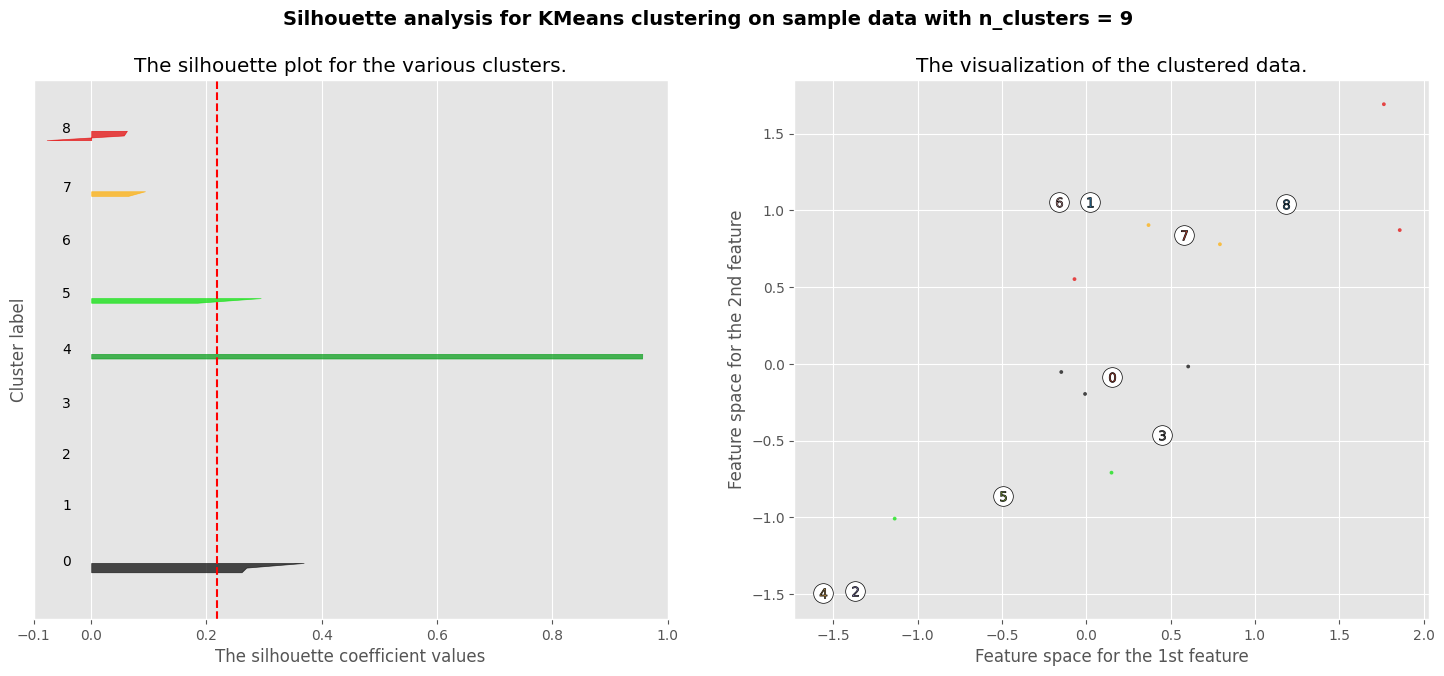

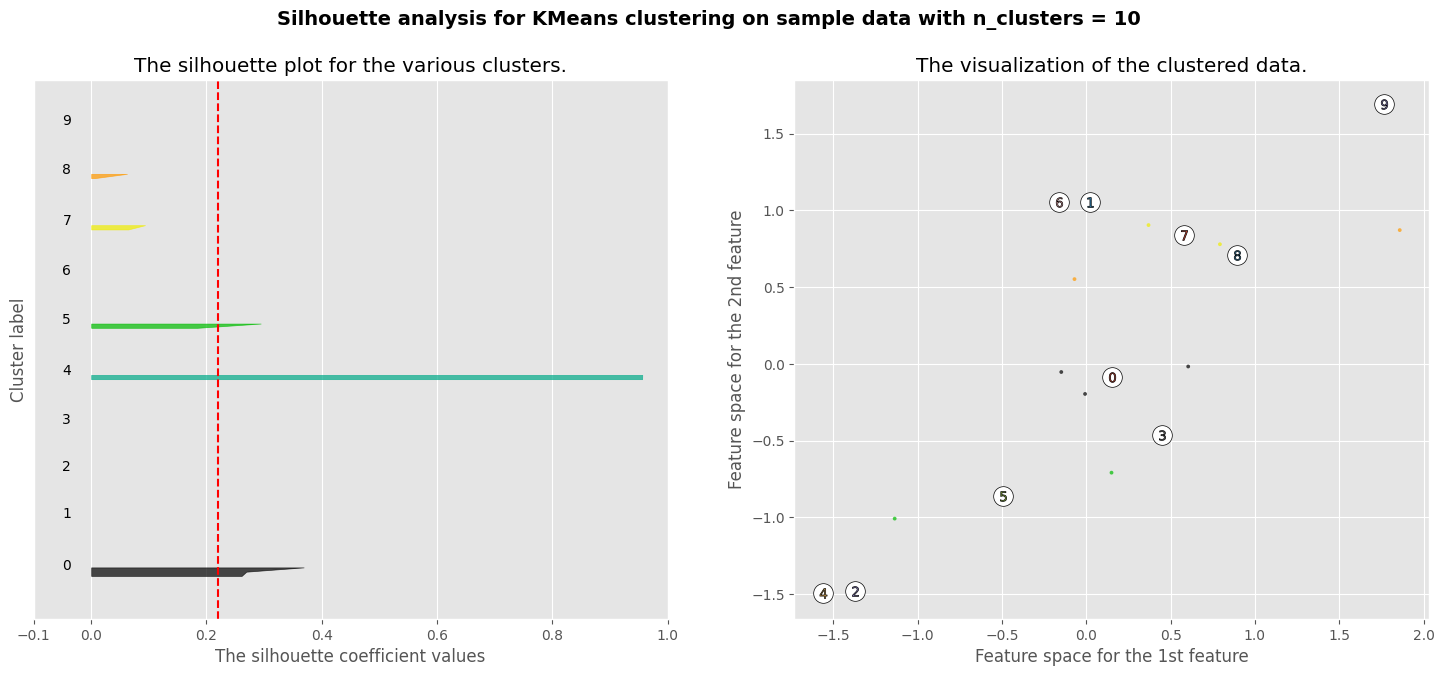

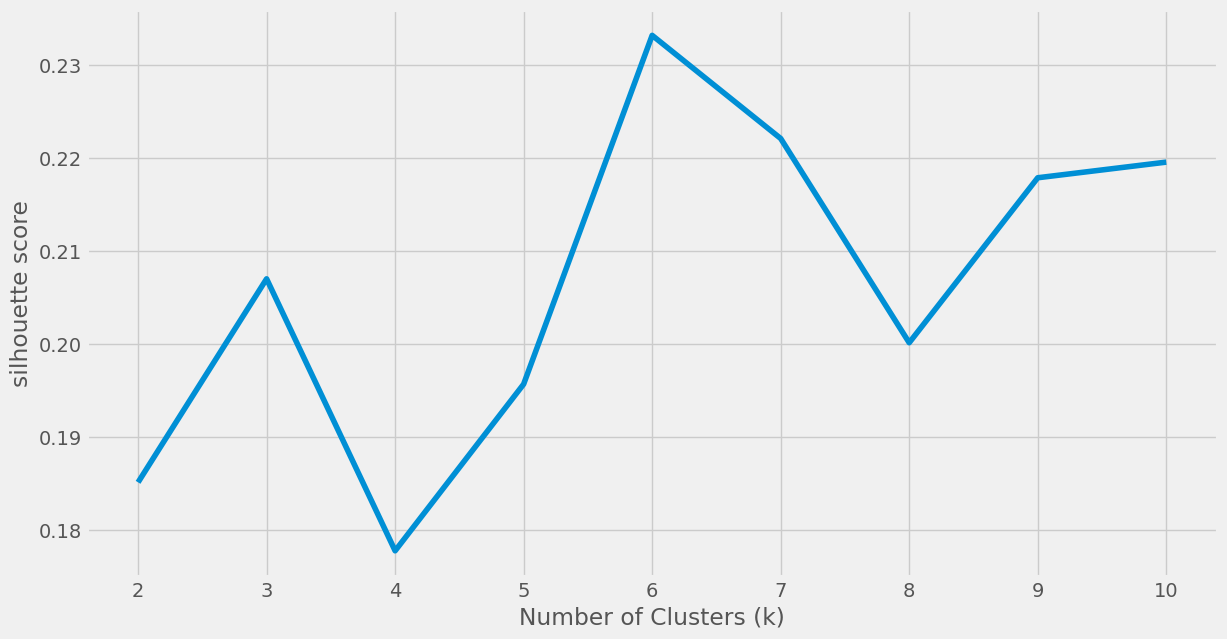

In [67]:
# https://towardsdatascience.com/silhouette-method-better-than-elbow-method-to-find-optimal-clusters-378d62ff6891

X = CLT_standard_norm.drop('Division', axis = 'columns')
X = X.values

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import matplotlib.style as style

range_n_clusters = [2, 3, 4, 5, 6,7,8,9,10]
silhouette_avg_n_clusters = []

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    #ax1.set_xlim([-0.1, 1]) retain for instructions above
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    silhouette_avg_n_clusters.append(silhouette_avg)
    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()


style.use("fivethirtyeight")
plt.plot(range_n_clusters, silhouette_avg_n_clusters)
plt.xlabel("Number of Clusters (k)")
plt.ylabel("silhouette score")
plt.show()

##  **Impact**



`Discuss the possible impact of your project. This can be socially, ethically, etc. It cannot be something like "our project has no impact" or "our project has no negative impact." Even the most well-intentioned projects *could* have a negative impact. We will not be checking for "right" or "wrong" answers, but showing your critical thinking.`

From the analysis we were able to see that some neighborhoods have similar types of crime.  This can be beneficial if a proposal or recommendation works for one area within a cluster, it might be a good suggestion to try the same recommendation on a neighborhood in that cluster.

When technology is used in crime prevention, it can be both positive and negative. The positive impact is that law enforcement could meet with city officials to discuss ways to reduce crime by increasing lighting in areas, increased police patrols in certain or talking with community groups who are able to go into the neighborhoods (along with law enforcement) to make a positive impact. In addition,by clustering neighborhoods, if we find a solution that works within one neighborhood in a cluster, it might be appropiate to try it in a similar neighborhood.

On the negative side, law enforcement could decide to increase patrols in certain areas to the point that everyone in the community feels as if they were under surveillance. It's possible that crime could be reduced, because the criminals are leaving one area and moving to another area.

#References:
##### 1 - 6 used during Project 1
1.   https://www.charlottenc.gov/cmpd/News-Information/Crime-Statistics-Report
2.   https://data.charlottenc.gov/datasets/charlotte::cmpd-incidents-1/about
3.   https://ui.charlotte.edu/story/how-find-information-your-neighborhood
4.   https://www.charlottenc.gov/cmpd/ePolicing-Resources/Patrol-Area-Divisions
5.   https://www.wired.com/story/crime-prediction-racist-history/
6.   https://www.pbs.org/newshour/nation/why-shootings-and-violence-increase-in-the-summer-months
7.   CoPilot - how to embed HTML file into gthub
8. https://maps.mecknc.gov/openmapping/data.html
9. https://towardsdatascience.com/geopandas-101-plot-any-data-with-a-latitude-and-longitude-on-a-map-98e01944b972

10. https://medium.com/@shankhanilborthakur/plotting-data-visualisation-on-the-map-of-india-using-geopandas-in-python-211bc88c1e4d
11. CompletedCluseringDemo.ipynb
12. https://www.statology.org/k-means-clustering-in-python/
13. https://towardsdatascience.com/silhouette-method-better-than-elbow-method-to-find-optimal-clusters-378d62ff6891
14. https://towardsdatascience.com/machine-learning-algorithms-part-12-hierarchical-agglomerative-clustering-example-in-python-1e18e0075019



